In [22]:
import pandas as pd

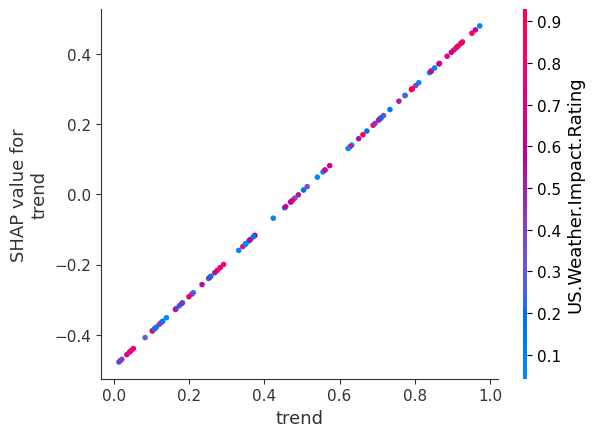

In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression

# Load JSON file
with open(r'C:\Users\DeepakArun\Desktop\TWC\Robyn\ExportedModel.json', 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())
model = LinearRegression()
model.coef_ = np.array([coefficients[var] for var in feature_names])
model.intercept_ = intercept

# Prepare sample data (X) - This should be replaced with actual data
X = np.random.rand(100, len(feature_names))  # Replace with actual data

# Use SHAP to calculate SHAP values
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

# Function to plot SHAP values
def plot_shap_values(ax, shap_values, feature_names, index):
    shap.dependence_plot(index, shap_values.values, X, feature_names=feature_names, ax=ax)

# Plot SHAP values for a specific feature (for example, feature index 0)
fig, ax = plt.subplots()
plot_shap_values(ax, shap_values, feature_names, 0)
plt.show()


## Interaction effects

In [74]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import shap

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shapv2.xlsx")


#Min-Max Normalization
#df = df.drop('dep_var', axis=1)
#df= (df-df.min())/(df.max()-df.min())



# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}
model = LinearRegression()
model.coef_ = np.array([filtered_coefficients[var] for var in available_features])
model.intercept_ = intercept

# Prepare data (X) using only available features
X = df[available_features].values

# Use SHAP to calculate SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

#Get SHAP interaction values
#explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)

# SHAP interaction values (Approximation method)
#shap_interaction = shap_values.values[:, :, np.newaxis] / shap_values.values[:, np.newaxis, :]

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap = np.abs(shap_interaction).mean(axis=0)
#mean_shap = shap_interaction.mean(axis=0)
# Create a DataFrame from the mean SHAP values
df_shap = pd.DataFrame(mean_shap, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


Available features: ['trend', 'season', 'holiday', 'Preference', 'US_Weather_Impact_Rating', 'Net_Trust', 'NPS', 'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: []


AttributeError: 'LinearExplainer' object has no attribute 'shap_interaction_values'

Available features: ['trend', 'season', 'holiday', 'Preference', 'US_Weather_Impact_Rating', 'Net_Trust', 'NPS', 'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: []


C:\Users\DeepakArun\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


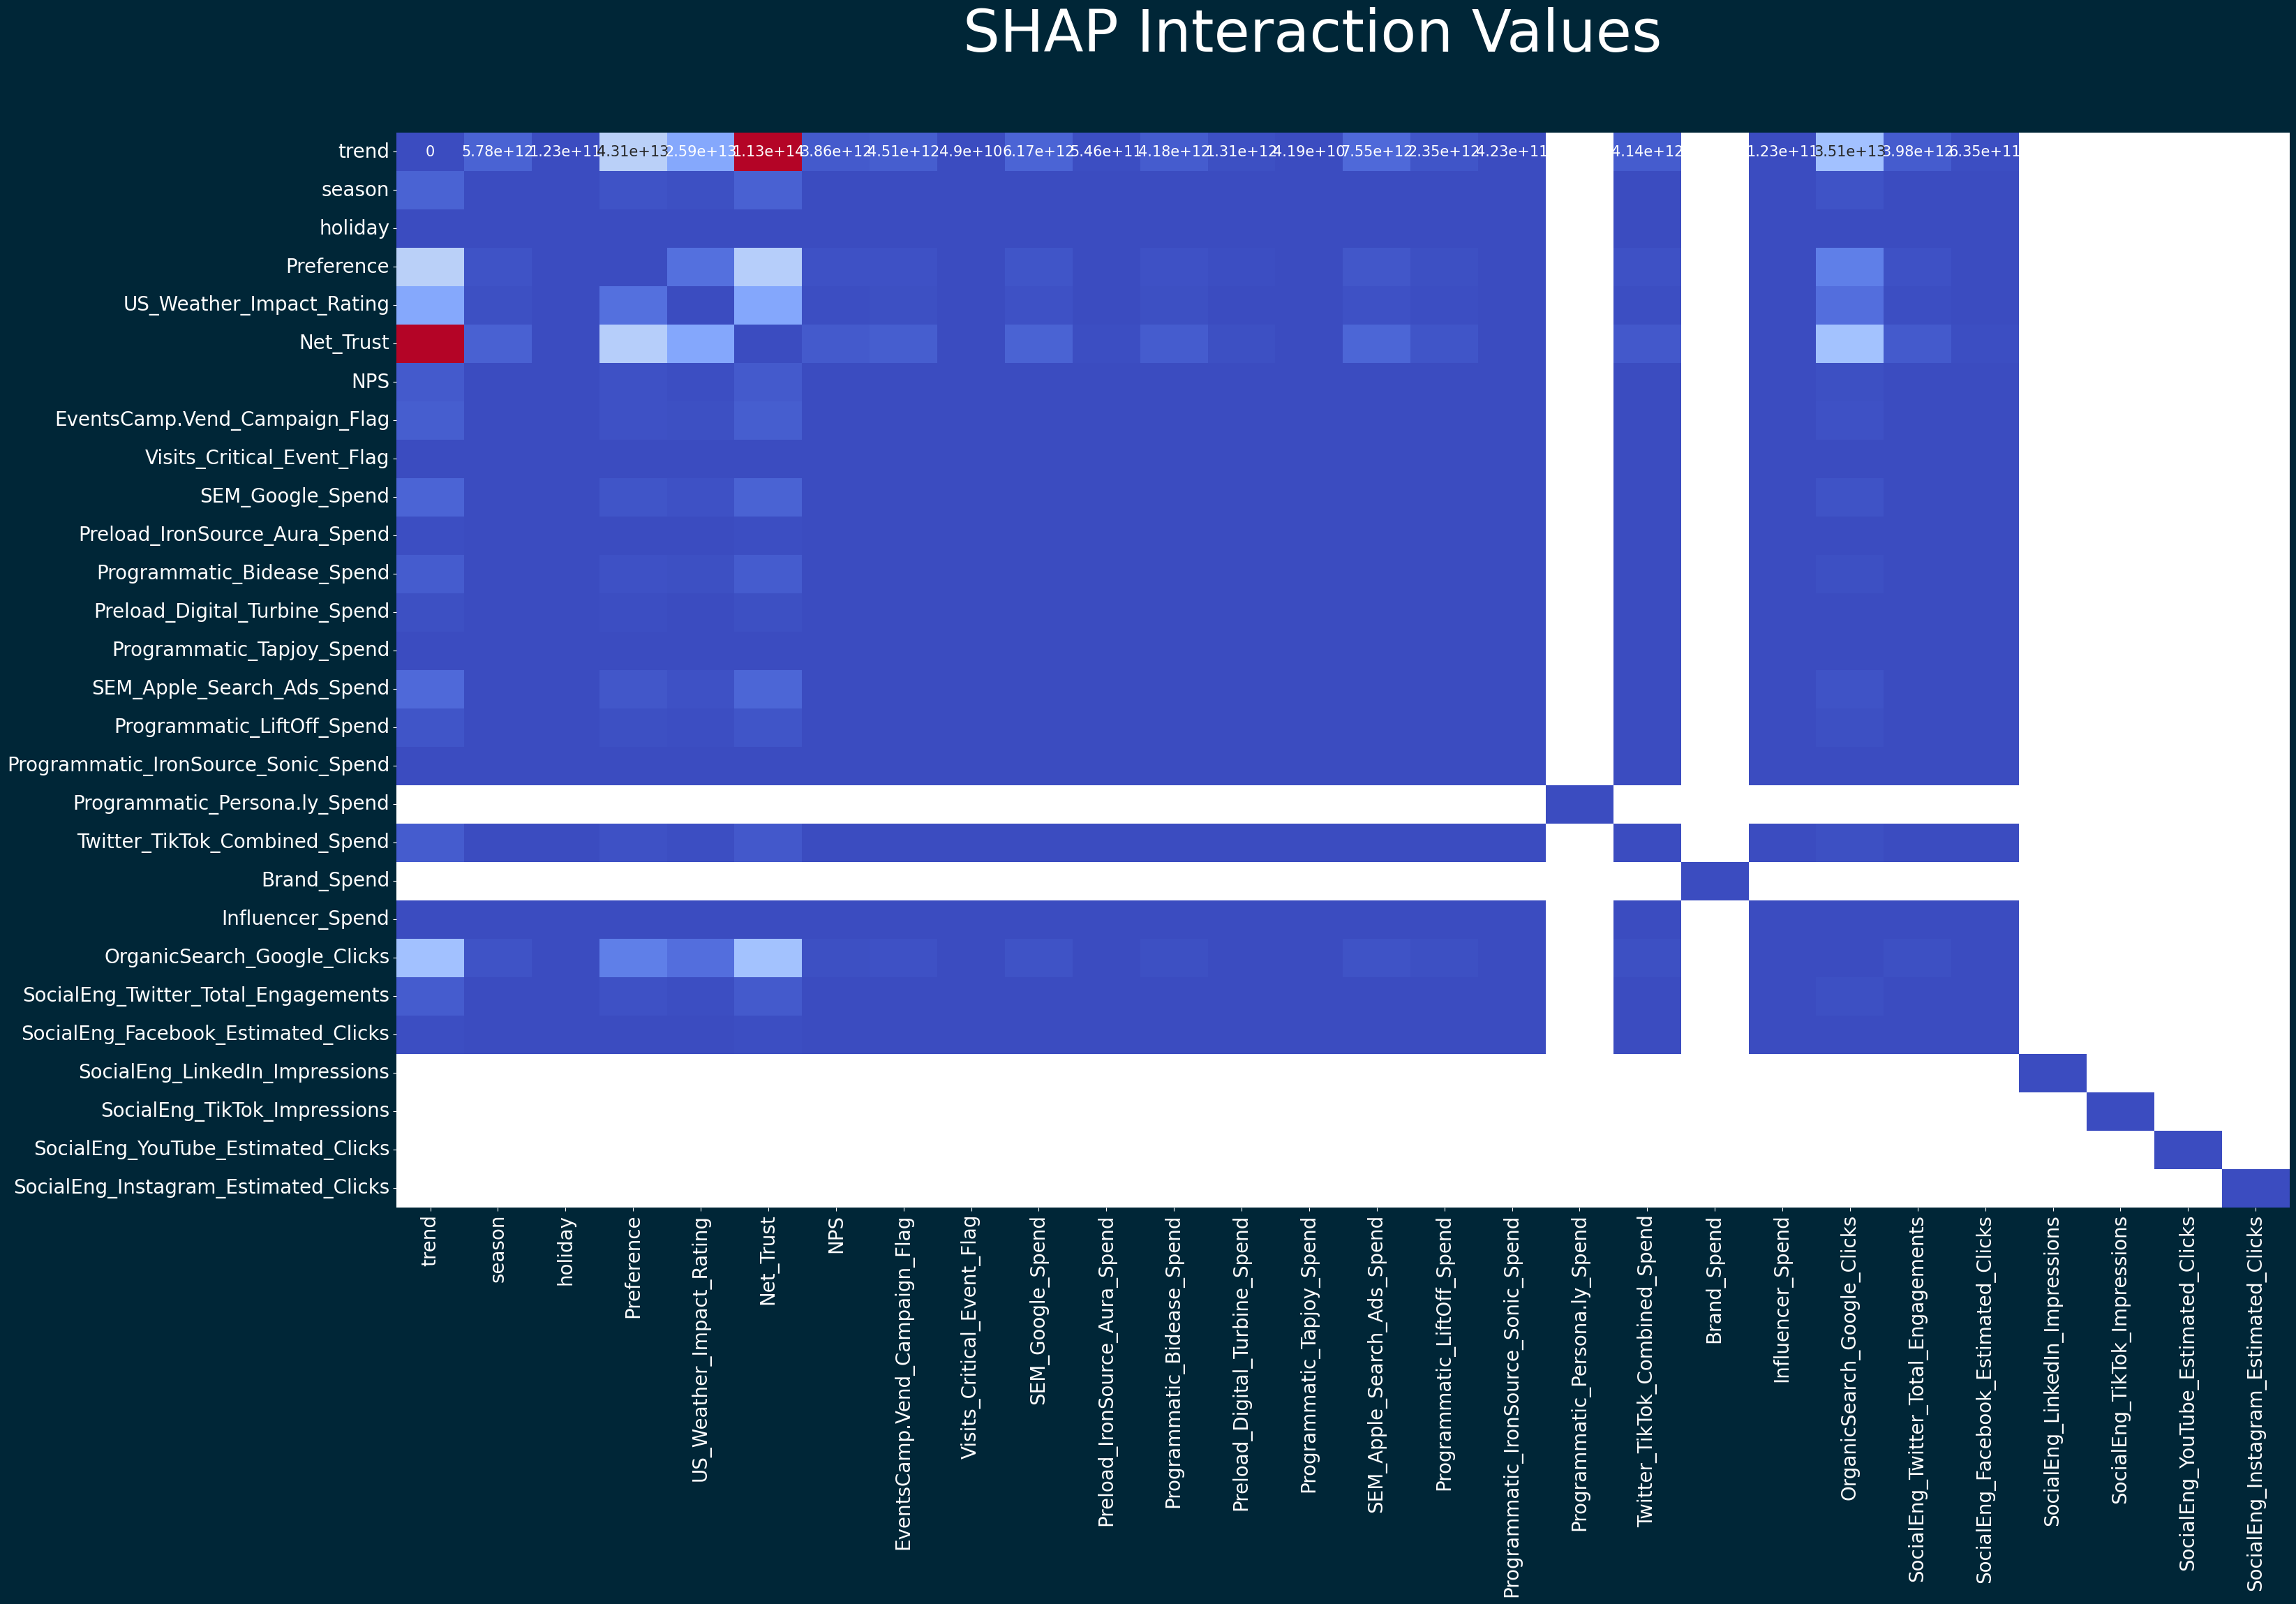

In [84]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import shap

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shapv2.xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}
model = LinearRegression()
model.coef_ = np.array([filtered_coefficients[var] for var in available_features])
model.intercept_ = intercept

# Prepare data (X) using only available features
X = df[available_features].values

# Use SHAP to calculate SHAP values
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

# Initialize SHAP interaction values matrix
num_features = len(available_features)
shap_interaction_values = np.zeros((X.shape[0], num_features, num_features))

# Calculate SHAP interaction values
for i in range(num_features):
    for j in range(i + 1, num_features):
        shap_interaction_values[:, i, j] = filtered_coefficients[available_features[i]] * filtered_coefficients[available_features[j]] * X[:, i] * X[:, j] / 2
        shap_interaction_values[:, j, i] = shap_interaction_values[:, i, j]  # Symmetric

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap_interaction = np.abs(shap_interaction_values).mean(axis=0)

# Create a DataFrame from the mean SHAP interaction values
df_shap = pd.DataFrame(mean_shap_interaction, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP Interaction Values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0)
plt.show()


In [92]:
shap_values

.values =
array([[ 2355299.67495585,   -96789.23841728,     3332.54142955, ...,
                      nan,               nan,               nan],
       [ 2357227.53661298,  -107835.61654897,     3332.54142955, ...,
                      nan,               nan,               nan],
       [ 2359155.39827001,  -123653.15354836,     3332.54142955, ...,
                      nan,               nan,               nan],
       ...,
       [-2793462.42419249,  -115612.32235107,     3332.54142955, ...,
                      nan,               nan,               nan],
       [-2798253.15113963,  -110790.08460459,     3332.54142955, ...,
                      nan,               nan,               nan],
       [-2803043.87808678,   -98433.40596678,     3332.54142955, ...,
                      nan,               nan,               nan]])

.base_values =
array([nan, nan, nan, ..., nan, nan, nan])

.data =
array([[15761663.85923255,  -233189.90816178,        0.        , ...,
                      n

In [86]:
df_shap= df_shap.fillna(0)

In [88]:
df_shap

trend        season  \
trend                                 0.000000e+00  5.780515e+12   
season                                5.780515e+12  0.000000e+00   
holiday                               1.225583e+11  8.179709e+09   
Preference                            4.307374e+13  2.085178e+12   
US_Weather_Impact_Rating              2.586310e+13  1.263639e+12   
Net_Trust                             1.125196e+14  5.478844e+12   
NPS                                   3.858667e+12  1.810366e+11   
EventsCamp.Vend_Campaign_Flag         4.510979e+12  2.646011e+11   
Visits_Critical_Event_Flag            4.897883e+10  2.707322e+09   
SEM_Google_Spend                      6.169969e+12  3.022027e+11   
Preload_IronSource_Aura_Spend         5.463385e+11  2.417415e+10   
Programmatic_Bidease_Spend            4.184325e+12  1.923781e+11   
Preload_Digital_Turbine_Spend         1.311950e+12  6.475381e+10   
Programmatic_Tapjoy_Spend             4.193374e+10  2.042125e+09   
SEM_Apple_Search_Ads_Spend            7.550786e+12  3.735920e+11   
Programmatic_LiftOff_Spend            2.350817e+12  1.539399e+11   
Programmatic_IronSource_Sonic_Spend   4.234075e+11  2.462765e+10   
Programmatic_Persona.ly_Spend         0.000000e+00  0.000000e+00   
Twitter_TikTok_Combined_Spend         4.138072e+12  1.910638e+11   
Brand_Spend                           0.000000e+00  0.000000e+00   
Influencer_Spend                      1.231670e+11  8.367492e+09   
OrganicSearch_Google_Clicks           3.508986e+13  1.777403e+12   
SocialEng_Twitter_Total_Engagements   3.980423e+12  1.959706e+11   
SocialEng_Facebook_Estimated_Clicks   6.354392e+11  3.282526e+10   
SocialEng_LinkedIn_Impressions        0.000000e+00  0.000000e+00   
SocialEng_TikTok_Impressions          0.000000e+00  0.000000e+00   
SocialEng_YouTube_Estimated_Clicks    0.000000e+00  0.000000e+00   
SocialEng_Instagram_Estimated_Clicks  0.000000e+00  0.000000e+00   

                                           holiday    Preference  \
trend                                 1.225583e+11  4.307374e+13   
season                                8.179709e+09  2.085178e+12   
holiday                               0.000000e+00  4.322609e+10   
Preference                            4.322609e+10  0.000000e+00   
US_Weather_Impact_Rating              2.817014e+10  9.577028e+12   
Net_Trust                             1.139946e+11  4.151481e+13   
NPS                                   3.664542e+09  1.448720e+12   
EventsCamp.Vend_Campaign_Flag         4.750502e+09  1.722451e+12   
Visits_Critical_Event_Flag            8.586523e+07  1.865461e+10   
SEM_Google_Spend                      6.408970e+09  2.206128e+12   
Preload_IronSource_Aura_Spend         4.777582e+08  1.949580e+11   
Programmatic_Bidease_Spend            3.138330e+09  1.540267e+12   
Preload_Digital_Turbine_Spend         1.493134e+09  4.534460e+11   
Programmatic_Tapjoy_Spend             3.520976e+07  1.538496e+10   
SEM_Apple_Search_Ads_Spend            5.891897e+09  2.681492e+12   
Programmatic_LiftOff_Spend            2.963063e+09  9.261569e+11   
Programmatic_IronSource_Sonic_Spend   2.789493e+08  1.576080e+11   
Programmatic_Persona.ly_Spend         0.000000e+00  0.000000e+00   
Twitter_TikTok_Combined_Spend         4.192042e+09  1.390989e+12   
Brand_Spend                           0.000000e+00  0.000000e+00   
Influencer_Spend                      8.405349e+08  4.579316e+10   
OrganicSearch_Google_Clicks           3.443754e+10  1.336728e+13   
SocialEng_Twitter_Total_Engagements   4.439341e+09  1.451612e+12   
SocialEng_Facebook_Estimated_Clicks   7.378573e+08  2.243169e+11   
SocialEng_LinkedIn_Impressions        0.000000e+00  0.000000e+00   
SocialEng_TikTok_Impressions          0.000000e+00  0.000000e+00   
SocialEng_YouTube_Estimated_Clicks    0.000000e+00  0.000000e+00   
SocialEng_Instagram_Estimated_Clicks  0.000000e+00  0.000000e+00   

                                      US_Weather_Impact_Rating     Net_Trust  \
trend              

In [89]:
df_shap= df_shap.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

print(df_normalized)

                                           trend      season     holiday  \
trend                                   0.000000  100.000000  100.000000   
season                                  5.137339    0.000000    6.674137   
holiday                                 0.108922    0.141505    0.000000   
Preference                             38.281094   36.072537   35.269819   
US_Weather_Impact_Rating               22.985412   21.860315   22.985090   
Net_Trust                             100.000000   94.781248   93.012528   
NPS                                     3.429328    3.131841    2.990040   
EventsCamp.Vend_Campaign_Flag           4.009060    4.577467    3.876116   
Visits_Critical_Event_Flag              0.043529    0.046835    0.070061   
SEM_Google_Spend                        5.483460    5.227955    5.229323   
Preload_IronSource_Aura_Spend           0.485549    0.418201    0.389821   
Programmatic_Bidease_Spend              3.718751    3.328045    2.560683   
Preload_Digi

In [91]:
df_normalized.to_clipboard()

Available features: ['trend', 'season', 'holiday', 'Preference', 'US_Weather_Impact_Rating', 'Net_Trust', 'NPS', 'EventsCamp.Vend_Campaign_Flag', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: []


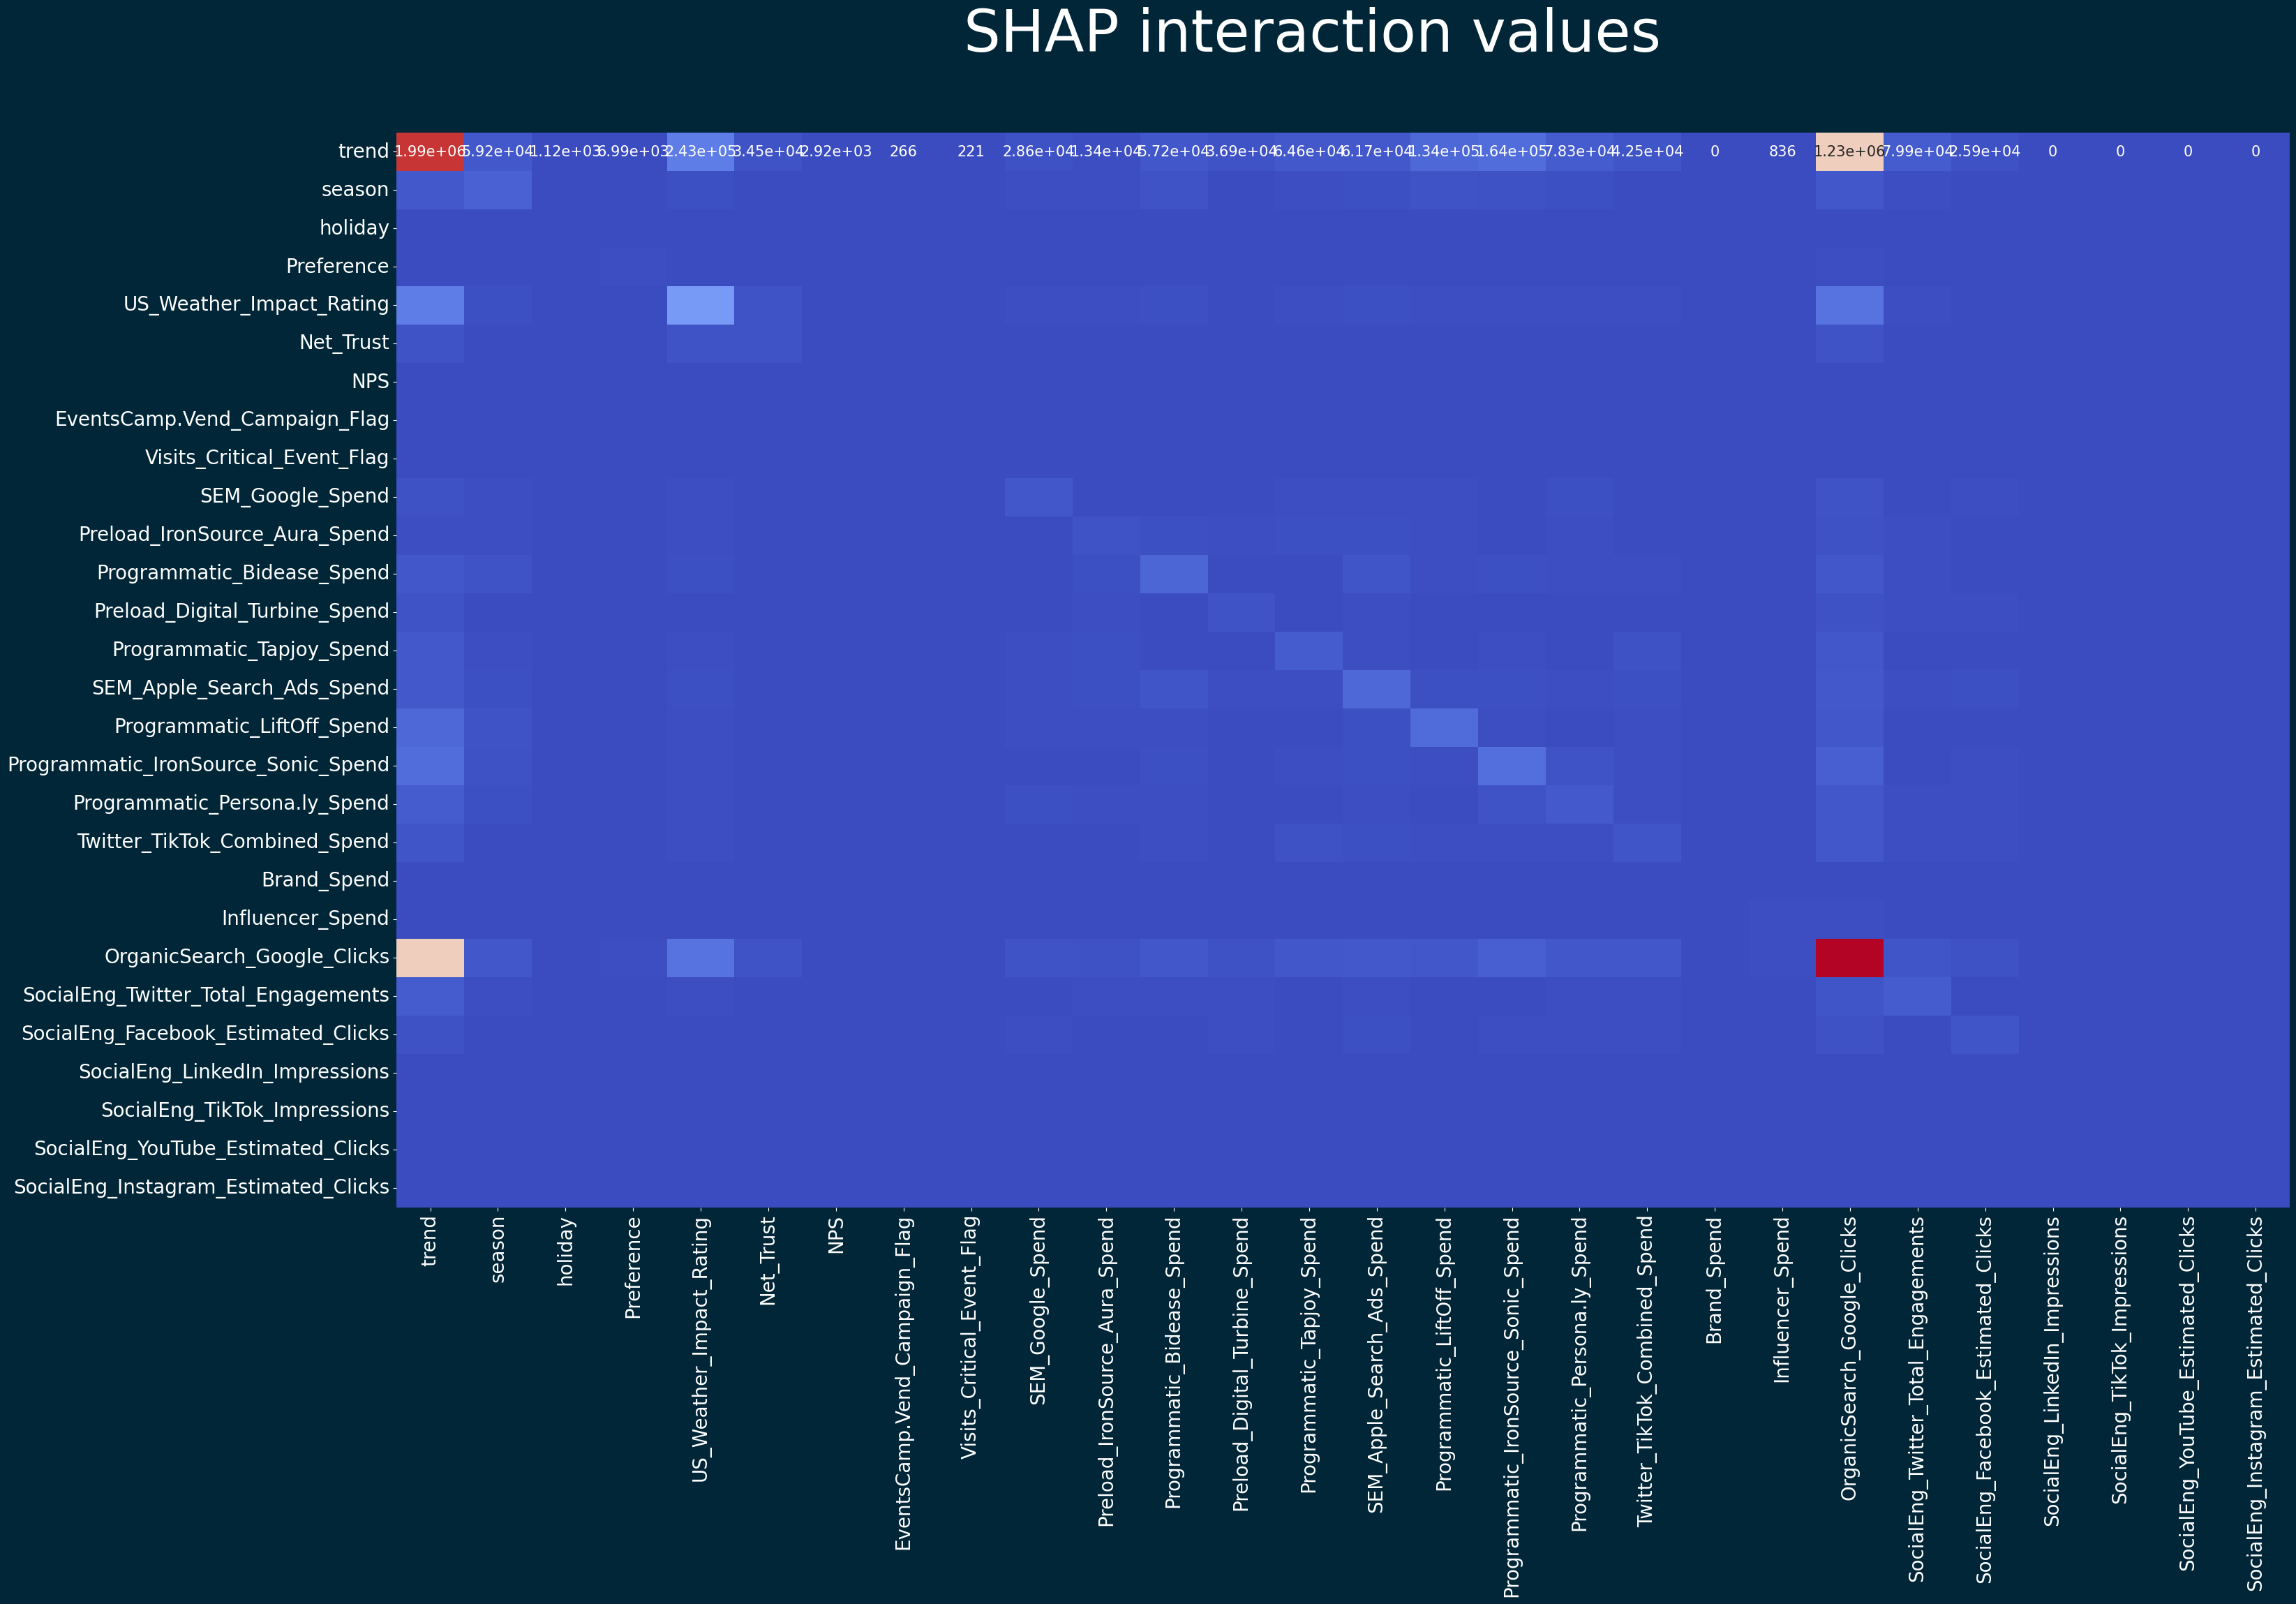

In [69]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\Shapv2.xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}

# Prepare data (X) using only available features
X = df[available_features].values
y = df['dep_var'].values  # Replace 'target_variable' with the actual name of your target variable

# Fit a tree-based model (XGBoost in this case)
model = xgb.XGBRegressor()
model.fit(X, y)

# Use SHAP to calculate SHAP values and interaction values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_interaction_values = explainer.shap_interaction_values(X)

# Compute the mean absolute SHAP interaction values along the correct axis
mean_shap = np.abs(shap_interaction_values).mean(axis=0)

# Create a DataFrame from the mean SHAP values
df_shap = pd.DataFrame(mean_shap, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


In [21]:
shap_values

.values =
array([[ 3.91962367e+06, -1.80246928e+04,  7.37168570e+03, ...,
         0.00000000e+00,  3.19133981e+14,  1.03508187e+13],
       [ 3.91310531e+06, -4.75703276e+04,  7.37168570e+03, ...,
         0.00000000e+00, -3.50670839e+14,  1.13855118e+13],
       [ 3.90658695e+06, -7.97860457e+04,  7.37168570e+03, ...,
         0.00000000e+00, -7.45316590e+14,  7.98928550e+12],
       ...,
       [-3.35469428e+06, -1.84721507e+05,  7.37168570e+03, ...,
         0.00000000e+00, -1.06481748e+14,  2.16209757e+12],
       [-3.36384692e+06, -1.82824562e+05,  7.37168570e+03, ...,
         0.00000000e+00, -3.31169969e+14, -8.53469488e+11],
       [-3.37299955e+06, -1.75959077e+05,  7.37168570e+03, ...,
         0.00000000e+00, -6.45497057e+14, -2.93709772e+12]])

.base_values =
array([6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.77001

In [23]:
shap_interaction

array([[[ 1.53634498e+13, -7.06500126e+10,  2.88942338e+10, ...,
          0.00000000e+00,  1.25088511e+21,  4.05713141e+19],
        [-7.06500126e+10,  3.24889550e+08, -1.32872370e+08, ...,
         -0.00000000e+00, -5.75229197e+18, -1.86570327e+17],
        [ 2.88942338e+10, -1.32872370e+08,  5.43417500e+07, ...,
          0.00000000e+00,  2.35255541e+18,  7.63029823e+16],
        ...,
        [ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.25088511e+21, -5.75229197e+18,  2.35255541e+18, ...,
          0.00000000e+00,  1.01846498e+29,  3.30329799e+27],
        [ 4.05713141e+19, -1.86570327e+17,  7.63029823e+16, ...,
          0.00000000e+00,  3.30329799e+27,  1.07139448e+26]],

       [[ 1.53123932e+13, -1.86147702e+11,  2.88461825e+10, ...,
          0.00000000e+00, -1.37221193e+21,  4.45527066e+19],
        [-1.86147702e+11,  2.26293606e+09, -3.50673503e+08, ...,
         -0.00000000e+00,  1.66815267e

In [30]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import shap

# Load JSON file
with open(r"C:\Users\DeepakArun\Documents\Desktop\TWC\Robyn\20k\RobynModel-1_1160_2.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
summary = exported_model['ExportedModel']['summary']

# Recreate the model (assuming a linear model for this example)
coefficients = {item['variable']: item['coef'] for item in summary}
intercept = coefficients.pop('(Intercept)', 0)

# Create a linear regression model and set its coefficients
feature_names = list(coefficients.keys())

# Read data from csv file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\shap.xlsx")


# Min-Max Normalization
#df = df.drop('dep_var', axis=1)
#df= (df-df.min())/(df.max()-df.min())



# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}
model = LinearRegression()
model.coef_ = np.array([filtered_coefficients[var] for var in available_features])
model.intercept_ = intercept

# Prepare data (X) using only available features
X = df[available_features].values

# Use SHAP to calculate SHAP values
explainer = shap.LinearExplainer(model, X)
shap_values = explainer(X)

#Get SHAP interaction values
#explainer = shap.TreeExplainer(model)
shap_interaction = explainer.interaction_values(X)

shap_values.interaction_values

Available features: ['trend', 'season', 'holiday', 'Preference', 'US.Weather.Impact.Rating', 'Seen.as.experts_lag181d', 'EventsCamp.Vend_Campaign_Flag', 'Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Facebook_Impressions']
Missing features: []


AttributeError: 'LinearExplainer' object has no attribute 'interaction_values'

In [25]:
shap_values

.values =
array([[ 3.91962367e+06, -1.80246928e+04,  7.37168570e+03, ...,
         0.00000000e+00,  3.19133981e+14,  1.03508187e+13],
       [ 3.91310531e+06, -4.75703276e+04,  7.37168570e+03, ...,
         0.00000000e+00, -3.50670839e+14,  1.13855118e+13],
       [ 3.90658695e+06, -7.97860457e+04,  7.37168570e+03, ...,
         0.00000000e+00, -7.45316590e+14,  7.98928550e+12],
       ...,
       [-3.35469428e+06, -1.84721507e+05,  7.37168570e+03, ...,
         0.00000000e+00, -1.06481748e+14,  2.16209757e+12],
       [-3.36384692e+06, -1.82824562e+05,  7.37168570e+03, ...,
         0.00000000e+00, -3.31169969e+14, -8.53469488e+11],
       [-3.37299955e+06, -1.75959077e+05,  7.37168570e+03, ...,
         0.00000000e+00, -6.45497057e+14, -2.93709772e+12]])

.base_values =
array([6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.770013e+15, 6.770013e+15, 6.770013e+15,
       6.770013e+15, 6.77001

Available features: ['Preference', 'NPS', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: ['(Intercept)', 'trend', 'season', 'holiday', 'US_Weather_Impact_Rating', 'Net_Trust', 'EventsCamp.Vend_Campaign_Flag']
R² Score: 0.8732
Adjusted R² Score: 0.8375
Mean Absolute Percentage Error (MAPE): 7.5973%


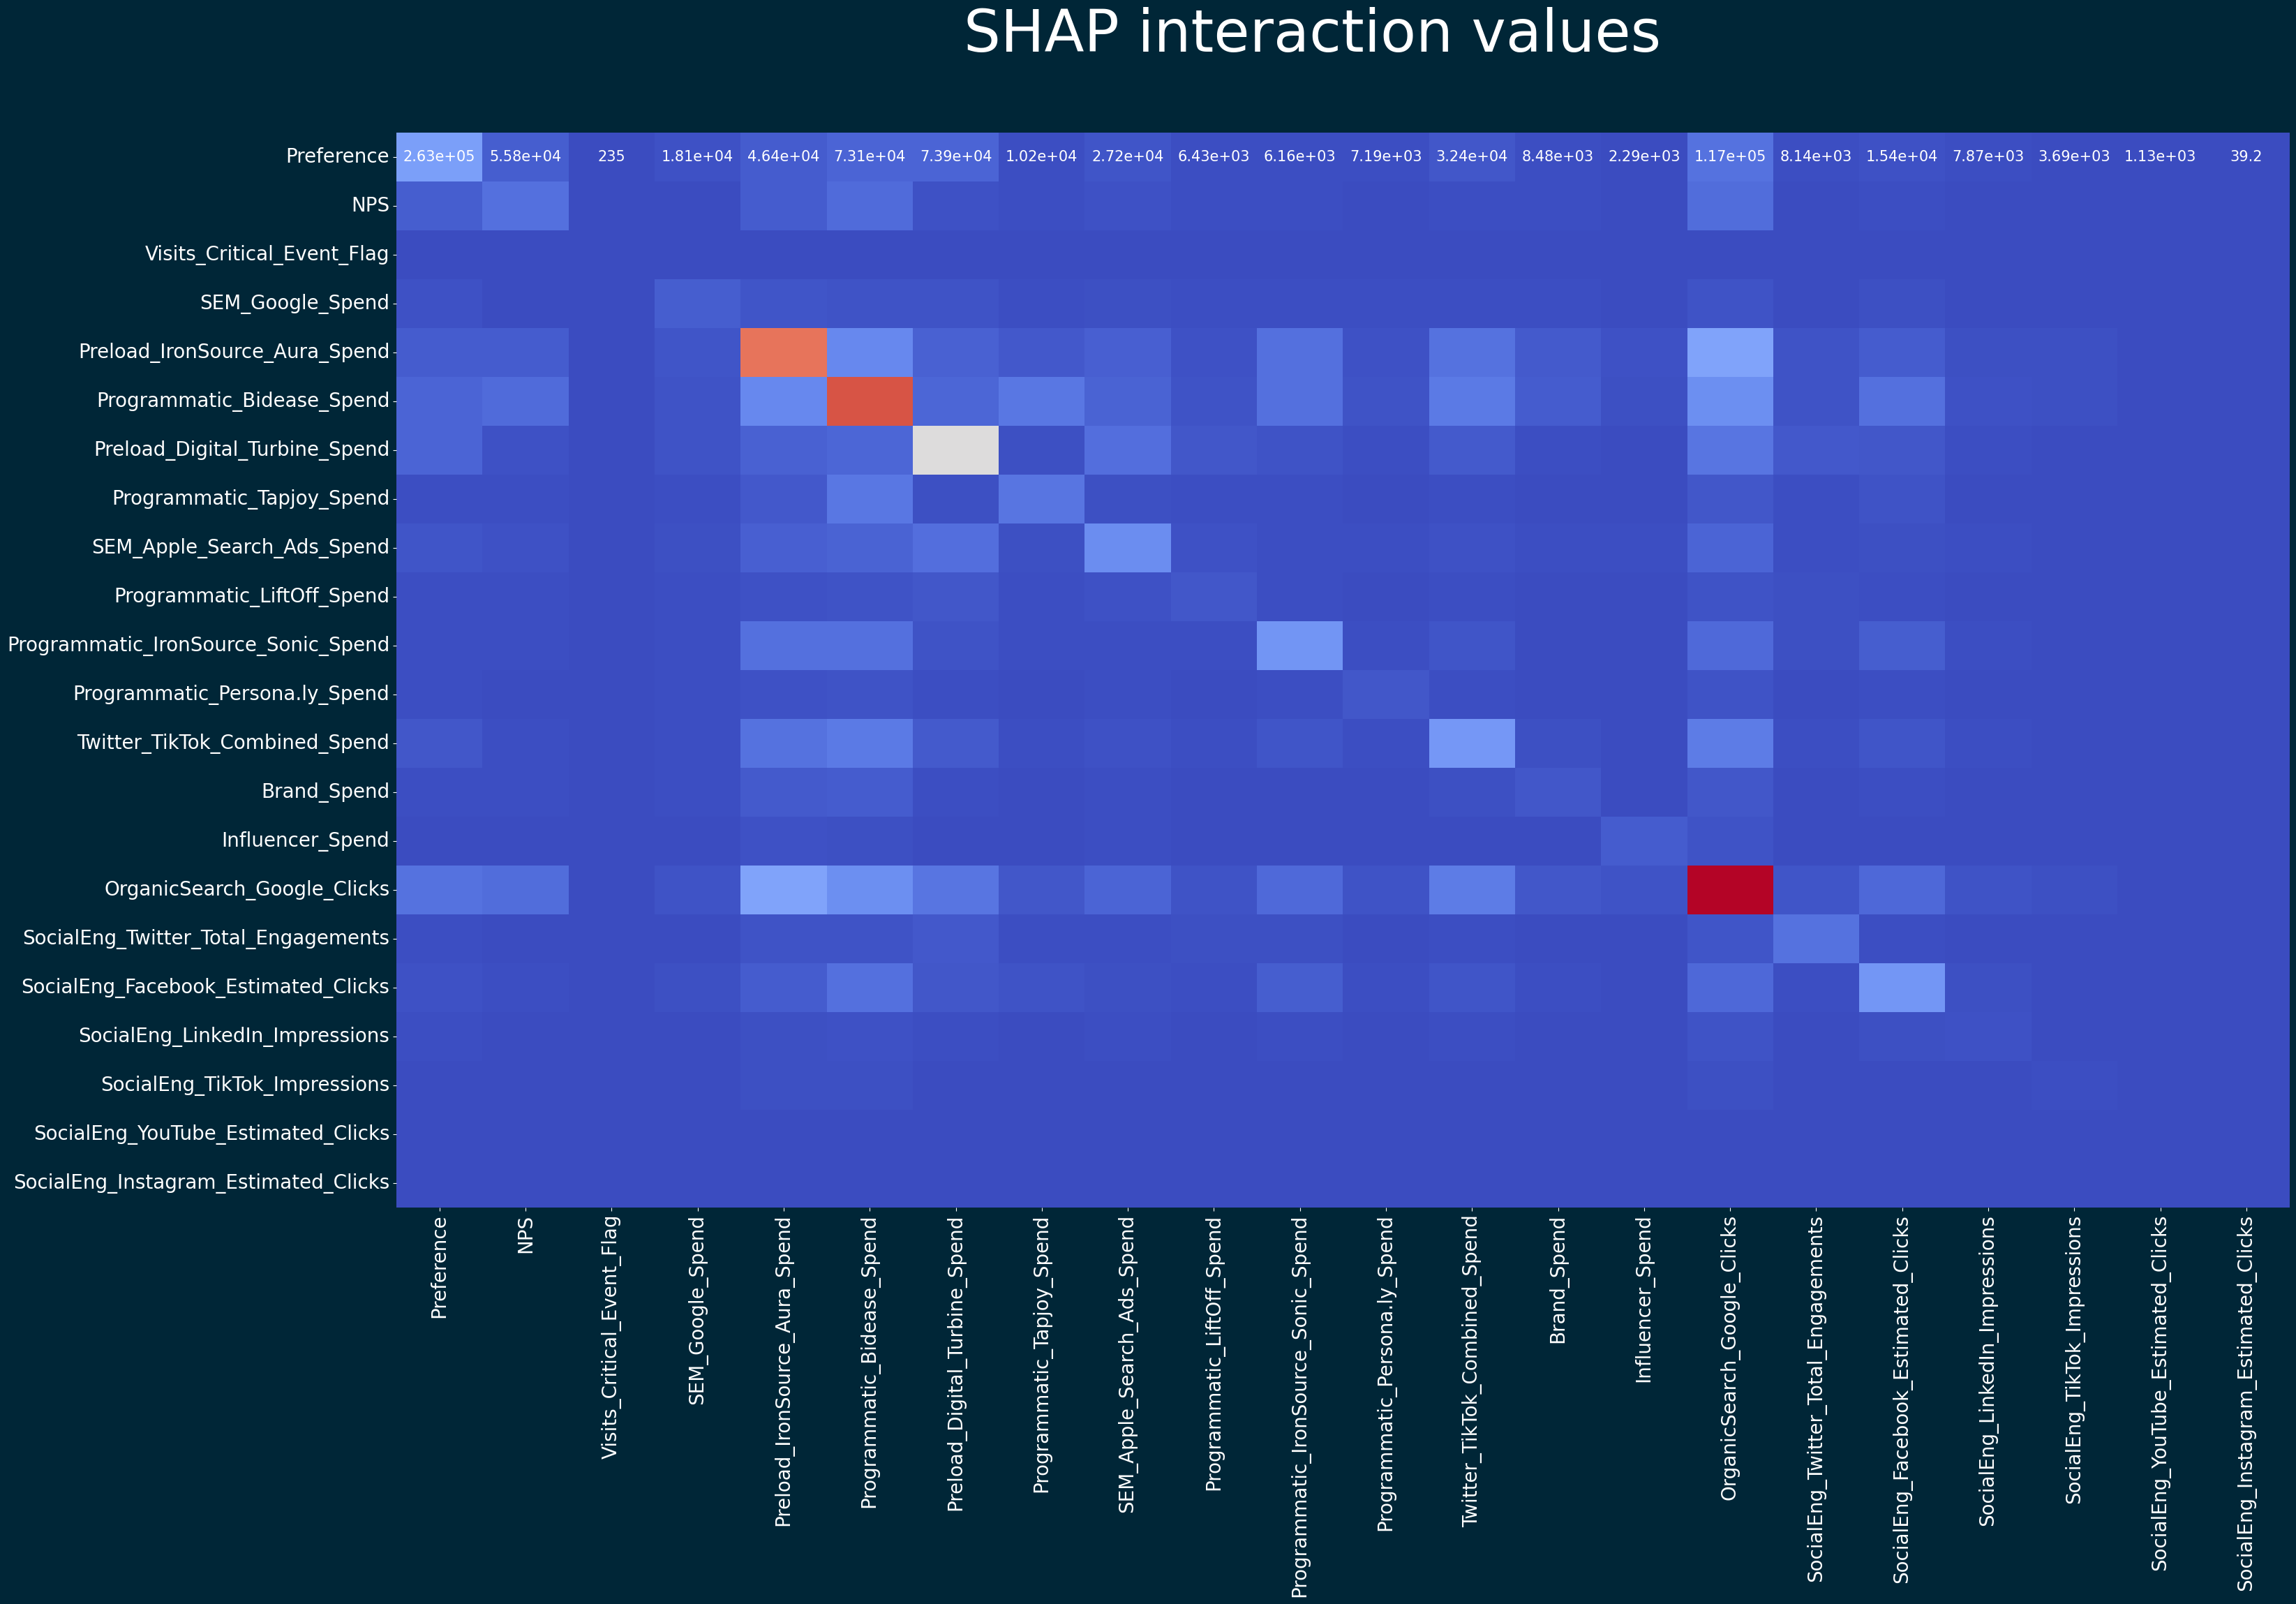

In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\TWC new\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
#summary = exported_model['ExportedModel']['summary']
#coefficients = {item['variable']: item['coef'] for item in summary}
#feature_names = list(coefficients.keys())

# Read data from Excel file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Latest ADS data (Preprocessing).xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Update the coefficients and feature names based on available features
#filtered_coefficients = {k: v for k, v in coefficients.items() if k in available_features}

# Prepare data (X) using only available features
X = df[available_features].values
y = df['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Use SHAP to calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Compute SHAP interaction values
# For RandomForest, shap_values might be a list of arrays if it's a multi-output model
if isinstance(shap_values, list):
    shap_values = shap_values[0]  # For regression, use the first array

# Calculate SHAP interaction values
interaction_values = shap.TreeExplainer(rf_model).shap_interaction_values(X_test)

# Compute mean SHAP interaction values across all samples
mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

# Create a DataFrame from the mean SHAP interaction values
df_shap = pd.DataFrame(mean_interaction_values, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP interaction values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


In [8]:
df_shap= df_shap.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

df_normalized

Preference         NPS  \
Preference                            100.000000   43.076279   
NPS                                    19.054683   93.059064   
Visits_Critical_Event_Flag              0.102307    0.541583   
SEM_Google_Spend                        5.498145    3.488911   
Preload_IronSource_Aura_Spend          15.934503   42.409272   
Programmatic_Bidease_Spend             28.975349   77.643919   
Preload_Digital_Turbine_Spend          23.216442   19.765040   
Programmatic_Tapjoy_Spend               5.687703    7.939036   
SEM_Apple_Search_Ads_Spend              6.814978   12.976767   
Programmatic_LiftOff_Spend              2.993410    7.887966   
Programmatic_IronSource_Sonic_Spend     2.282683    6.114803   
Programmatic_Persona.ly_Spend           3.195743    3.595952   
Twitter_TikTok_Combined_Spend          13.463142   14.737957   
Brand_Spend                             4.193848    7.885318   
Influencer_Spend                        0.405081    0.286084   
OrganicSearch_Google_Clicks            47.418461  100.000000   
SocialEng_Twitter_Total_Engagements     4.241357    6.394416   
SocialEng_Facebook_Estimated_Clicks     8.567396   11.088874   
SocialEng_LinkedIn_Impressions          3.733209    2.032039   
SocialEng_TikTok_Impressions            1.768078    1.603112   
SocialEng_YouTube_Estimated_Clicks      0.283025    0.778799   
SocialEng_Instagram_Estimated_Clicks    0.000000    0.000000   

                                      Visits_Critical_Event_Flag  \
Preference                                             10.145058   
NPS                                                    22.472358   
Visits_Critical_Event_Flag                             63.444882   
SEM_Google_Spend                                        5.835937   
Preload_IronSource_Aura_Spend                          50.078863   
Programmatic_Bidease_Spend                            100.000000   
Preload_Digital_Turbine_Spend                          47.758198   
Programmatic_Tapjoy_Spend                               6.045916   
SEM_Apple_Search_Ads_Spend                             27.527997   
Programmatic_LiftOff_Spend                             11.036817   
Programmatic_IronSource_Sonic_Spend                    38.285663   
Programmatic_Persona.ly_Spend                          12.945654   
Twitter_TikTok_Combined_Spend                          12.603719   
Brand_Spend                                            15.388228   
Influencer_Spend                                        2.243557   
OrganicSearch_Google_Clicks                            95.525031   
SocialEng_Twitter_Total_Engagements                    16.776426   
SocialEng_Facebook_Estimated_Clicks                    17.891348   
SocialEng_LinkedIn_Impressions                          5.961010   
SocialEng_TikTok_Impressions                            5.789874   
SocialEng_YouTube_Estimated_Clicks                      0.104502   
SocialEng_Instagram_Estimated_Clicks                    0.000000   

                                      SEM_Google_Spend  \
Preference                                   32.039673   
NPS                                           8.943473   
Visits_Critical_Event_Flag                    0.273634   
SEM_Google_Spend                            100.000000   
Preload_IronSource_Aura_Spend                85.596400   
Programmatic_Bidease_Spend                   79.116024   
Preload_Digital_Turbine_Spend                45.338625   
Programmatic_Tapjoy_Spend                    18.056896   
SEM_Apple_Search_Ads_Spend                   48.500236   
Programmatic_LiftOff_Spend                   19.181590   
Programmatic_IronSource_Sonic_Spend          31.006708   
Programmatic_Persona.ly_Spend                14.093106   
Twitter_TikTok_Combined_Spend                22.785898   
Brand_Spend                                   9.056474   
Influencer_Spend                              8.112298   
OrganicSearch_Google_Clicks                  63.604058   
SocialEng_Twit

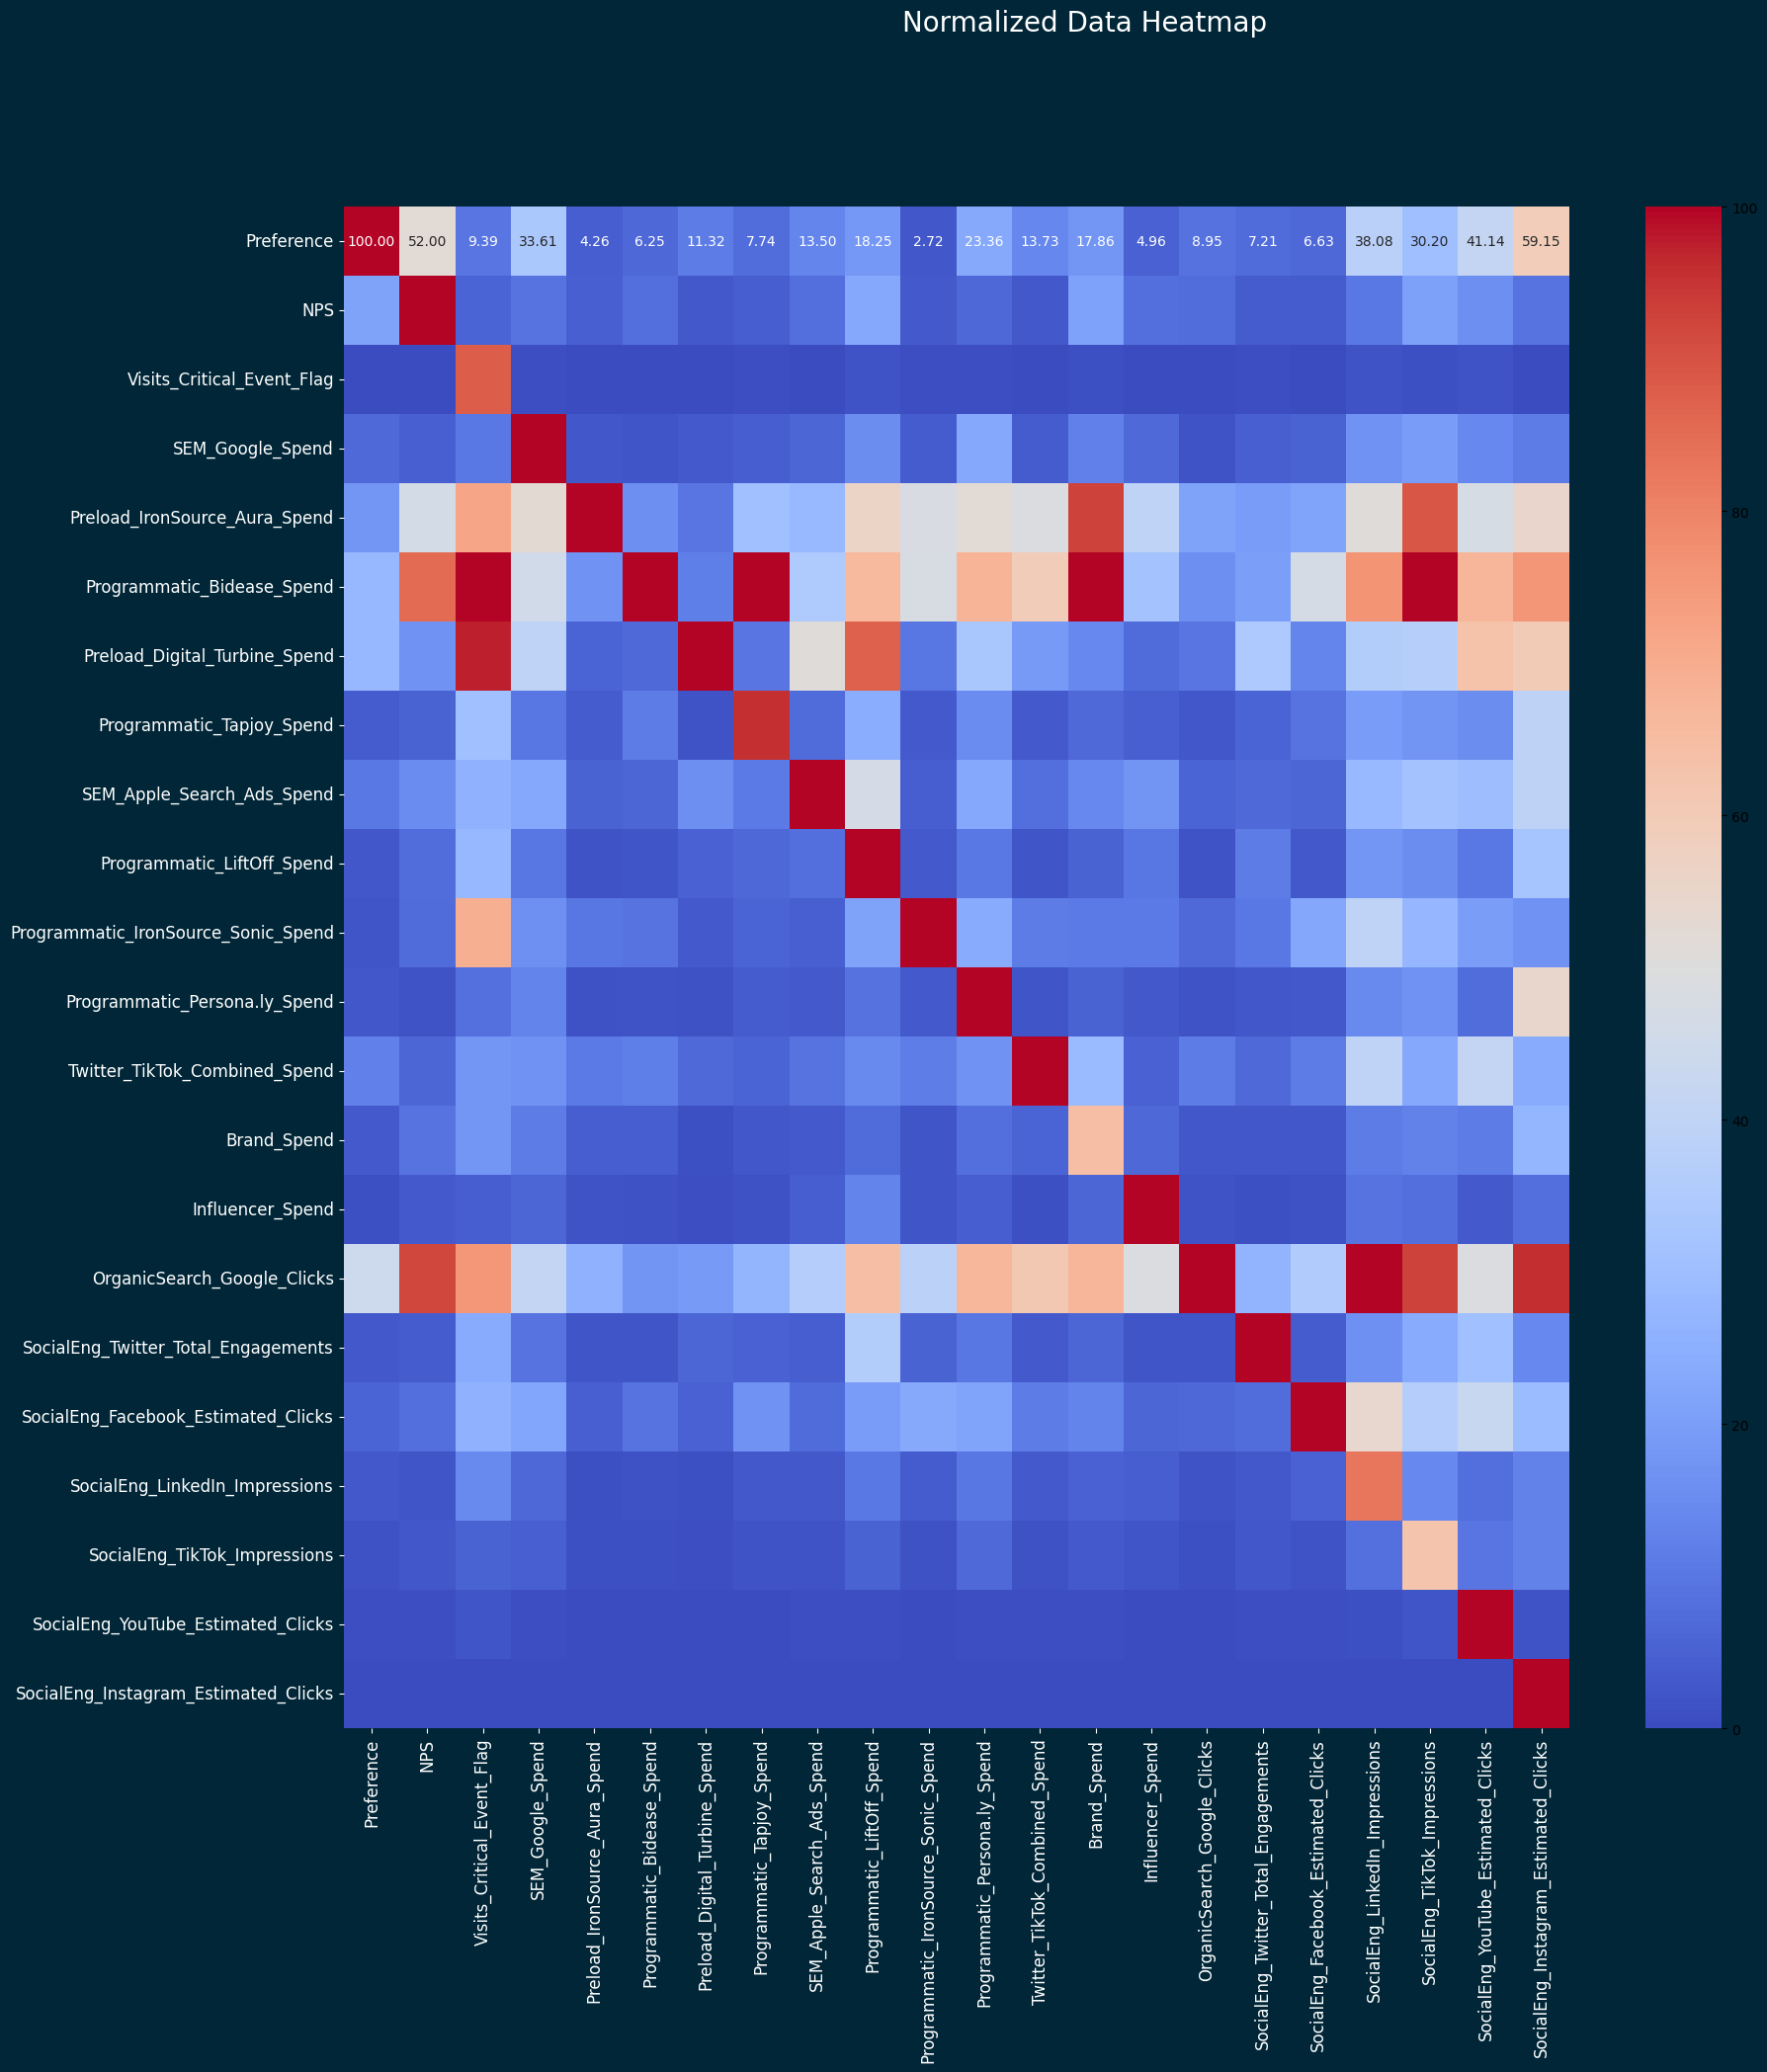

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalized is already defined
# For example, let's create a dummy df_normalized for demonstration
# You should replace this with your actual df_normalized DataFrame
# df_normalized = pd.DataFrame(np.random.rand(10, 10), columns=[f'Feature_{i}' for i in range(10)])

# Create a heatmap
fig = plt.figure(figsize=(20, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_normalized, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
            annot_kws={"size": 10})  # Adjust annotation font size as needed
ax.tick_params(axis='x', colors='w', labelsize=12, rotation=90)  # Adjust tick label size and rotation
ax.tick_params(axis='y', colors='w', labelsize=12)

plt.suptitle("Normalized Data Heatmap", color="white", fontsize=20, y=0.98)
plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
plt.show()


## Random Forest model

Available features: ['Preference', 'NPS', 'Visits_Critical_Event_Flag', 'SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend', 'OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
Missing features: ['(Intercept)', 'trend', 'season', 'holiday', 'US_Weather_Impact_Rating', 'Net_Trust', 'EventsCamp.Vend_Campaign_Flag']
R² Score: 0.9818
Adjusted R² Score: 0.9814
Mean Absolute Percentage Error (MAPE): 2.4559%


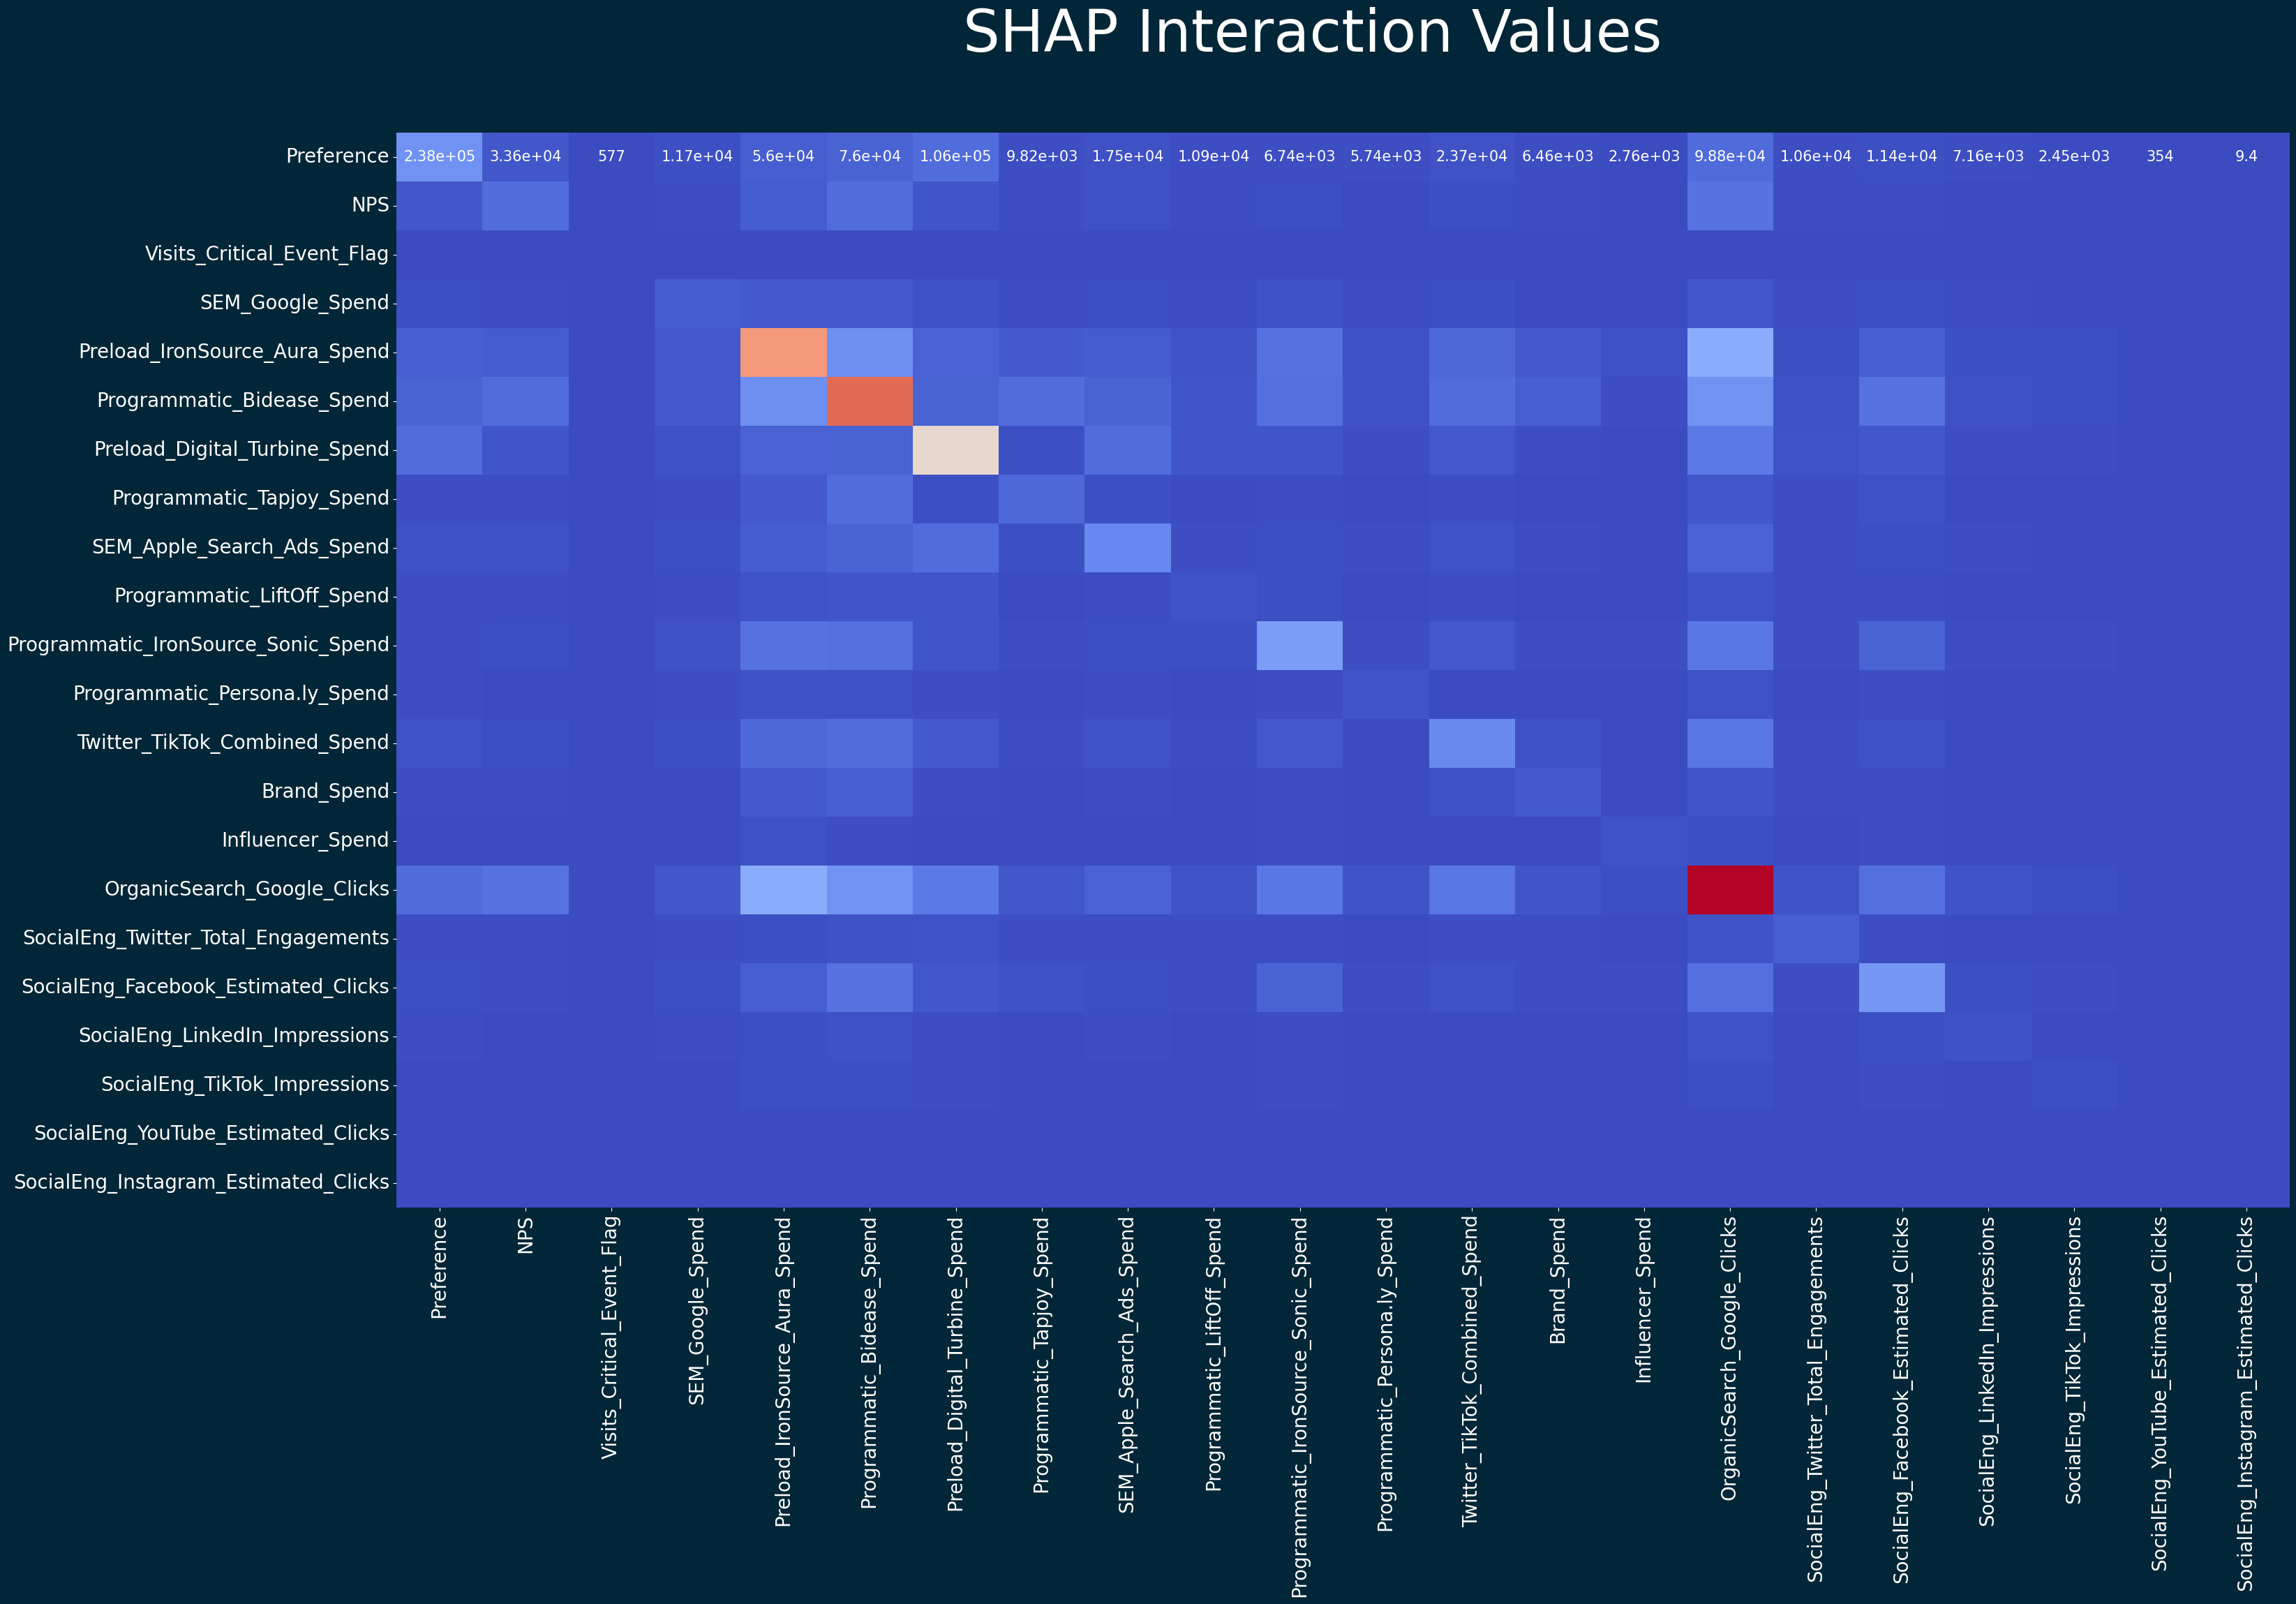

In [15]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load JSON file
with open(r"C:\Users\DeepakArun\Desktop\TWC new\V2model1.json", 'r') as file:
    exported_model = json.load(file)

# Extract model coefficients and variables
#summary = exported_model['ExportedModel']['summary']
#coefficients = {item['variable']: item['coef'] for item in summary}
#feature_names = list(coefficients.keys())

# Read data from Excel file
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Latest ADS data (Preprocessing).xlsx")

# Identify and remove features not present in the DataFrame
available_features = [feature for feature in feature_names if feature in df.columns]
missing_features = [feature for feature in feature_names if feature not in df.columns]

print("Available features:", available_features)
print("Missing features:", missing_features)

# Prepare data (X) using only available features
X = df[available_features].values
y = df['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Train Random Forest model using the entire dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict on the entire dataset
y_pred = rf_model.predict(X)

# Calculate R² score
r2 = r2_score(y, y_pred)

# Calculate Adjusted R²
n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate MAPE
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Use SHAP to calculate SHAP values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# Compute SHAP interaction values
interaction_values = shap.TreeExplainer(rf_model).shap_interaction_values(X)

# Compute mean SHAP interaction values across all samples
mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

# Create a DataFrame from the mean SHAP interaction values
df_shap = pd.DataFrame(mean_interaction_values, index=available_features, columns=available_features)

# Multiply off-diagonal elements by 2
for i in range(len(df_shap)):
    for j in range(len(df_shap)):
        if i != j:
            df_shap.iloc[i, j] *= 2

# Create the heatmap
fig = plt.figure(figsize=(35, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.3g', cbar=False, ax=ax,
            annot_kws={"size": 15})  # Set annotation font size
ax.tick_params(axis='x', colors='w', labelsize=20, rotation=90)  # Increase tick label size
ax.tick_params(axis='y', colors='w', labelsize=20)

plt.suptitle("SHAP Interaction Values", color="white", fontsize=60, y=0.97)
plt.yticks(rotation=0) 
plt.show()


In [16]:
df_shap= df_shap.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

df_normalized

Preference         NPS  \
Preference                            100.000000   26.376924   
NPS                                    14.088806   83.634527   
Visits_Critical_Event_Flag              0.238315    0.141066   
SEM_Google_Spend                        4.903573    4.321163   
Preload_IronSource_Aura_Spend          23.507744   42.295985   
Programmatic_Bidease_Spend             31.894488   81.398902   
Preload_Digital_Turbine_Spend          44.380009   21.549982   
Programmatic_Tapjoy_Spend               4.120425    7.149617   
SEM_Apple_Search_Ads_Spend              7.344984   13.212276   
Programmatic_LiftOff_Spend              4.564118    8.258490   
Programmatic_IronSource_Sonic_Spend     2.827454    9.907889   
Programmatic_Persona.ly_Spend           2.406607    2.221677   
Twitter_TikTok_Combined_Spend           9.935666    9.450965   
Brand_Spend                             2.709040    7.364097   
Influencer_Spend                        1.155721    2.161234   
OrganicSearch_Google_Clicks            41.483025  100.000000   
SocialEng_Twitter_Total_Engagements     4.466773    4.410055   
SocialEng_Facebook_Estimated_Clicks     4.791442    7.363939   
SocialEng_LinkedIn_Impressions          3.004805    3.841325   
SocialEng_TikTok_Impressions            1.023632    1.937497   
SocialEng_YouTube_Estimated_Clicks      0.144628    0.296996   
SocialEng_Instagram_Estimated_Clicks    0.000000    0.000000   

                                      Visits_Critical_Event_Flag  \
Preference                                             11.304941   
NPS                                                     3.684899   
Visits_Critical_Event_Flag                             73.829296   
SEM_Google_Spend                                        4.674855   
Preload_IronSource_Aura_Spend                          40.210385   
Programmatic_Bidease_Spend                             50.709498   
Preload_Digital_Turbine_Spend                          26.499960   
Programmatic_Tapjoy_Spend                              23.940129   
SEM_Apple_Search_Ads_Spend                              8.945350   
Programmatic_LiftOff_Spend                              4.320034   
Programmatic_IronSource_Sonic_Spend                    12.917341   
Programmatic_Persona.ly_Spend                          10.111658   
Twitter_TikTok_Combined_Spend                           6.208941   
Brand_Spend                                            11.710176   
Influencer_Spend                                        4.471642   
OrganicSearch_Google_Clicks                           100.000000   
SocialEng_Twitter_Total_Engagements                     4.434976   
SocialEng_Facebook_Estimated_Clicks                     9.764759   
SocialEng_LinkedIn_Impressions                          4.057007   
SocialEng_TikTok_Impressions                            7.164882   
SocialEng_YouTube_Estimated_Clicks                      0.701650   
SocialEng_Instagram_Estimated_Clicks                    0.000000   

                                      SEM_Google_Spend  \
Preference                                   23.217457   
NPS                                          10.909493   
Visits_Critical_Event_Flag                    0.422244   
SEM_Google_Spend                            100.000000   
Preload_IronSource_Aura_Spend                80.820134   
Programmatic_Bidease_Spend                   83.926581   
Preload_Digital_Turbine_Spend                32.637909   
Programmatic_Tapjoy_Spend                    14.563596   
SEM_Apple_Search_Ads_Spend                   30.350102   
Programmatic_LiftOff_Spend                   13.185796   
Programmatic_IronSource_Sonic_Spend          34.444004   
Programmatic_Persona.ly_Spend                12.126531   
Twitter_TikTok_Combined_Spend                23.187645   
Brand_Spend                                   8.069320   
Influencer_Spend                              3.377939   
OrganicSearch_Google_Clicks                  66.572222   
SocialEng_Twit

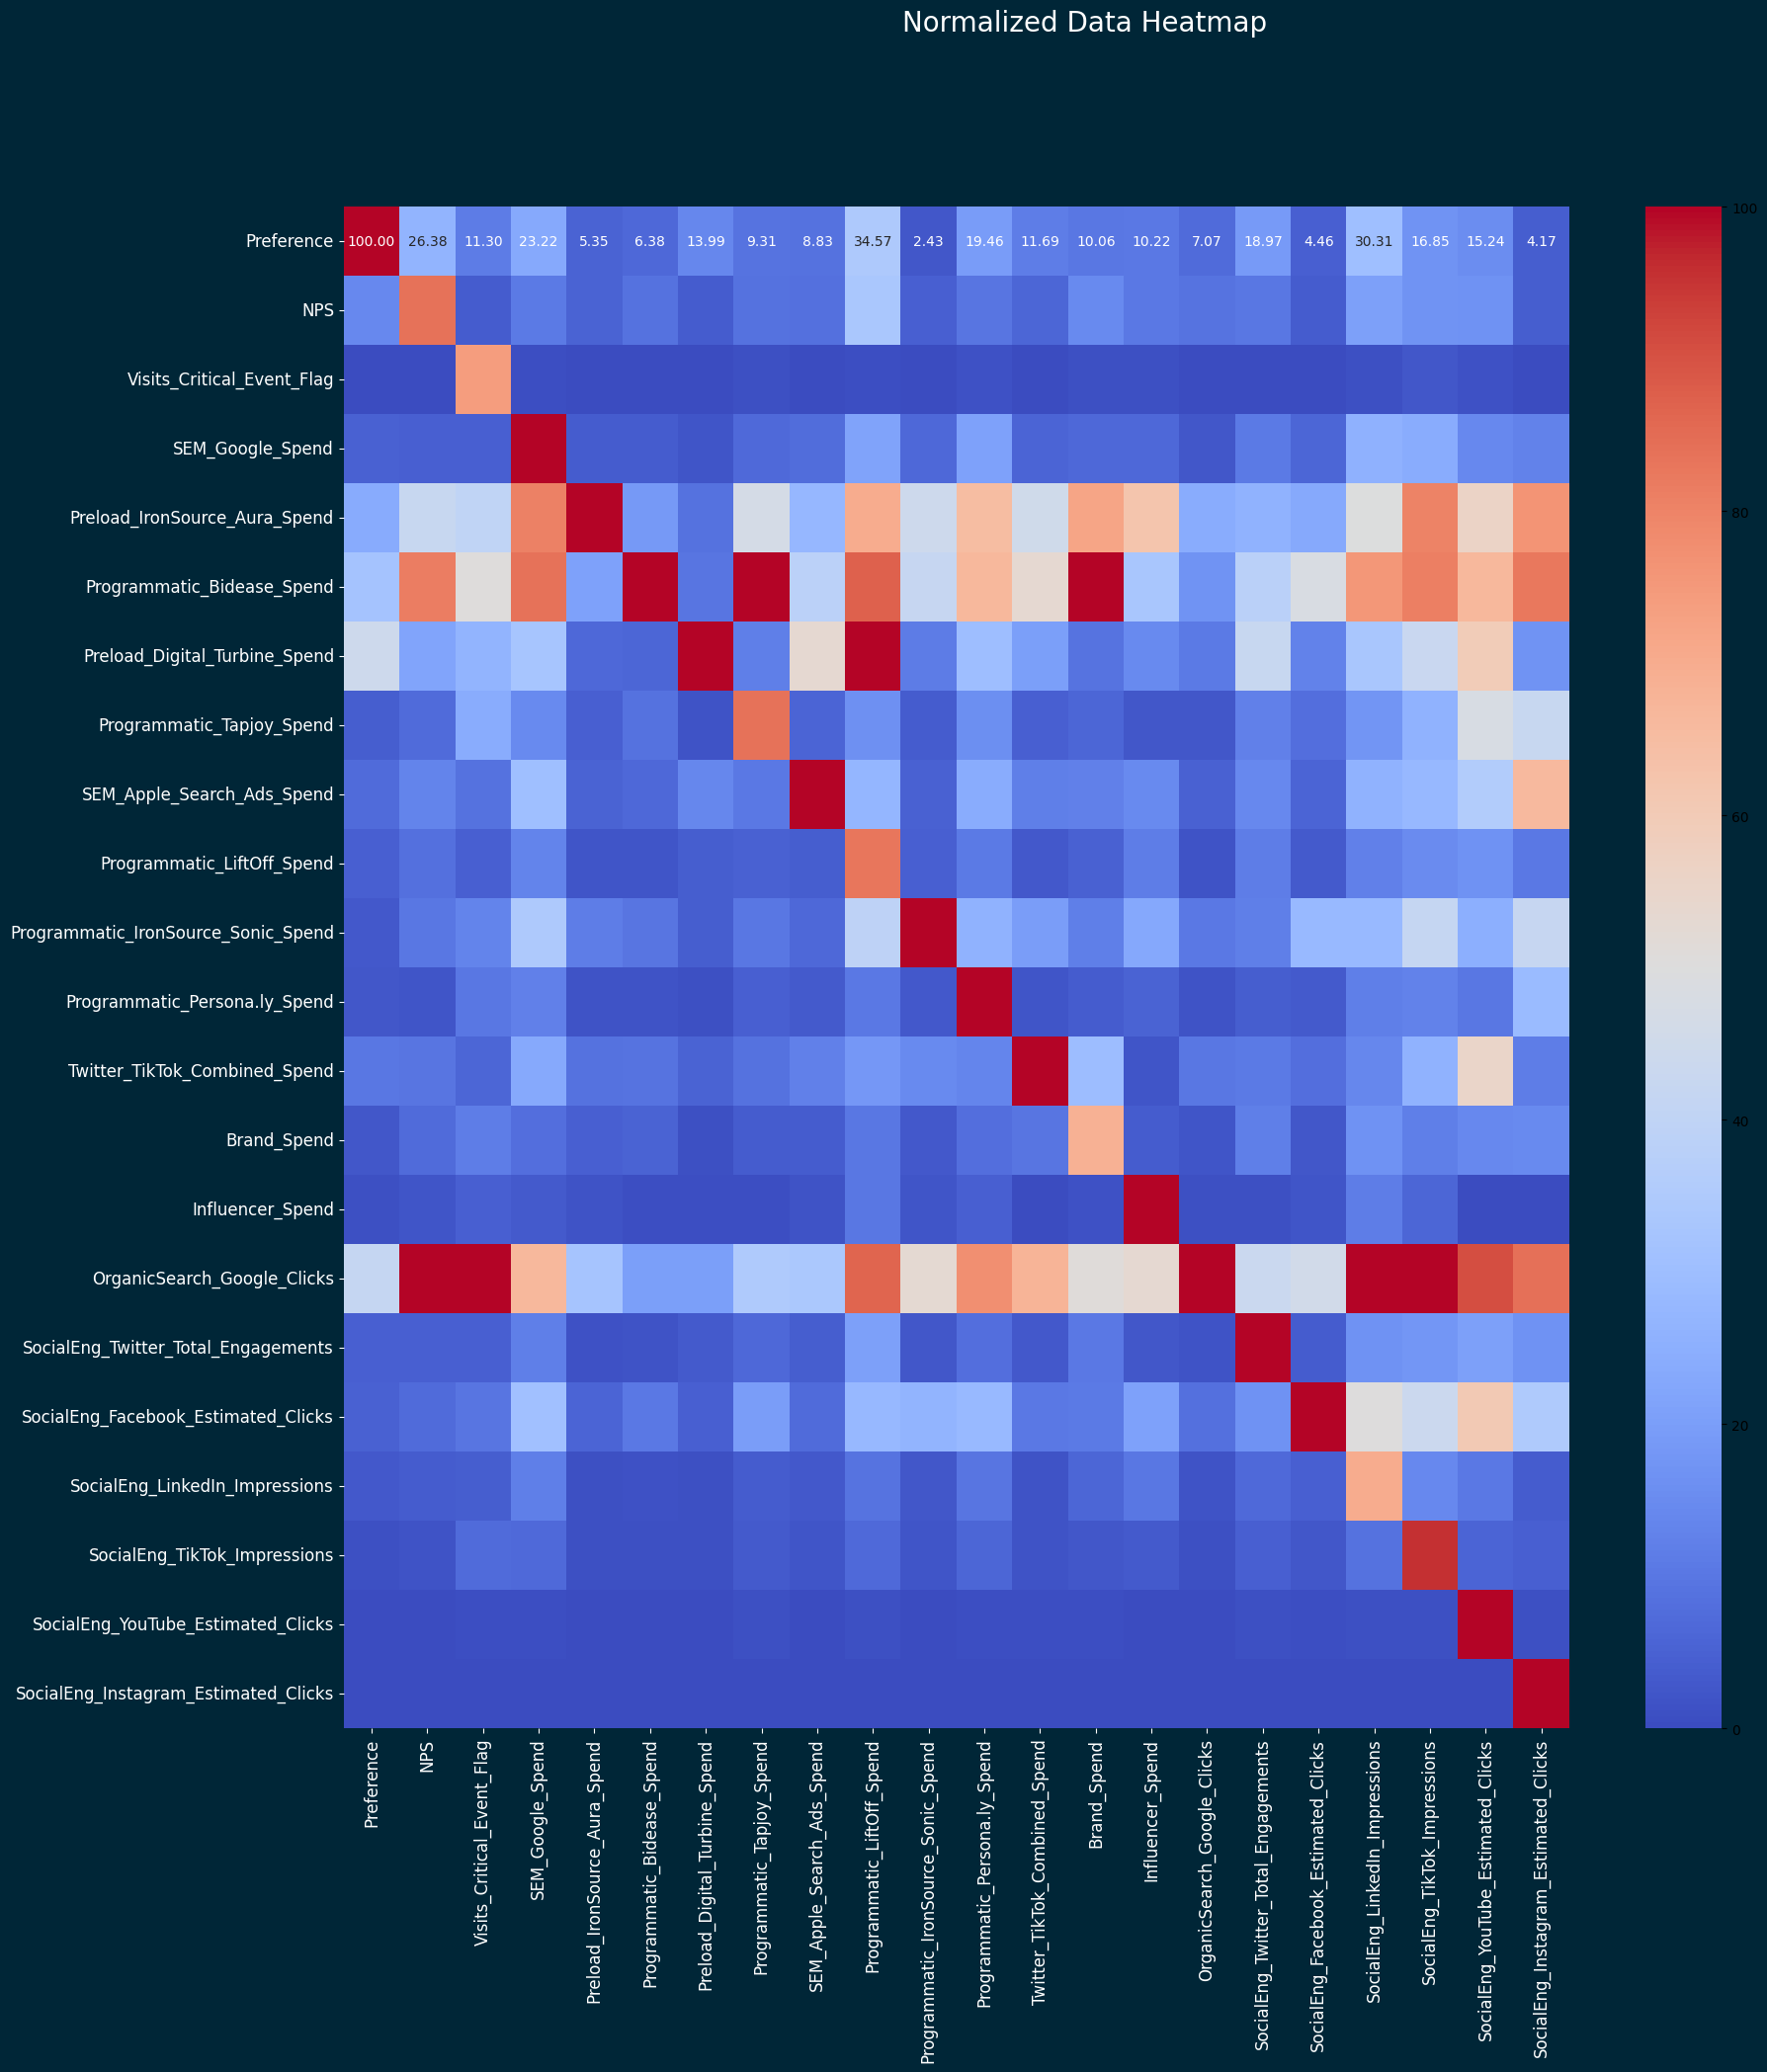

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalized is already defined
# For example, let's create a dummy df_normalized for demonstration
# You should replace this with your actual df_normalized DataFrame
# df_normalized = pd.DataFrame(np.random.rand(10, 10), columns=[f'Feature_{i}' for i in range(10)])

# Create a heatmap
fig = plt.figure(figsize=(20, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_normalized, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
            annot_kws={"size": 10})  # Adjust annotation font size as needed
ax.tick_params(axis='x', colors='w', labelsize=12, rotation=90)  # Adjust tick label size and rotation
ax.tick_params(axis='y', colors='w', labelsize=12)

plt.suptitle("Normalized Data Heatmap", color="white", fontsize=20, y=0.98)
plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
plt.show()


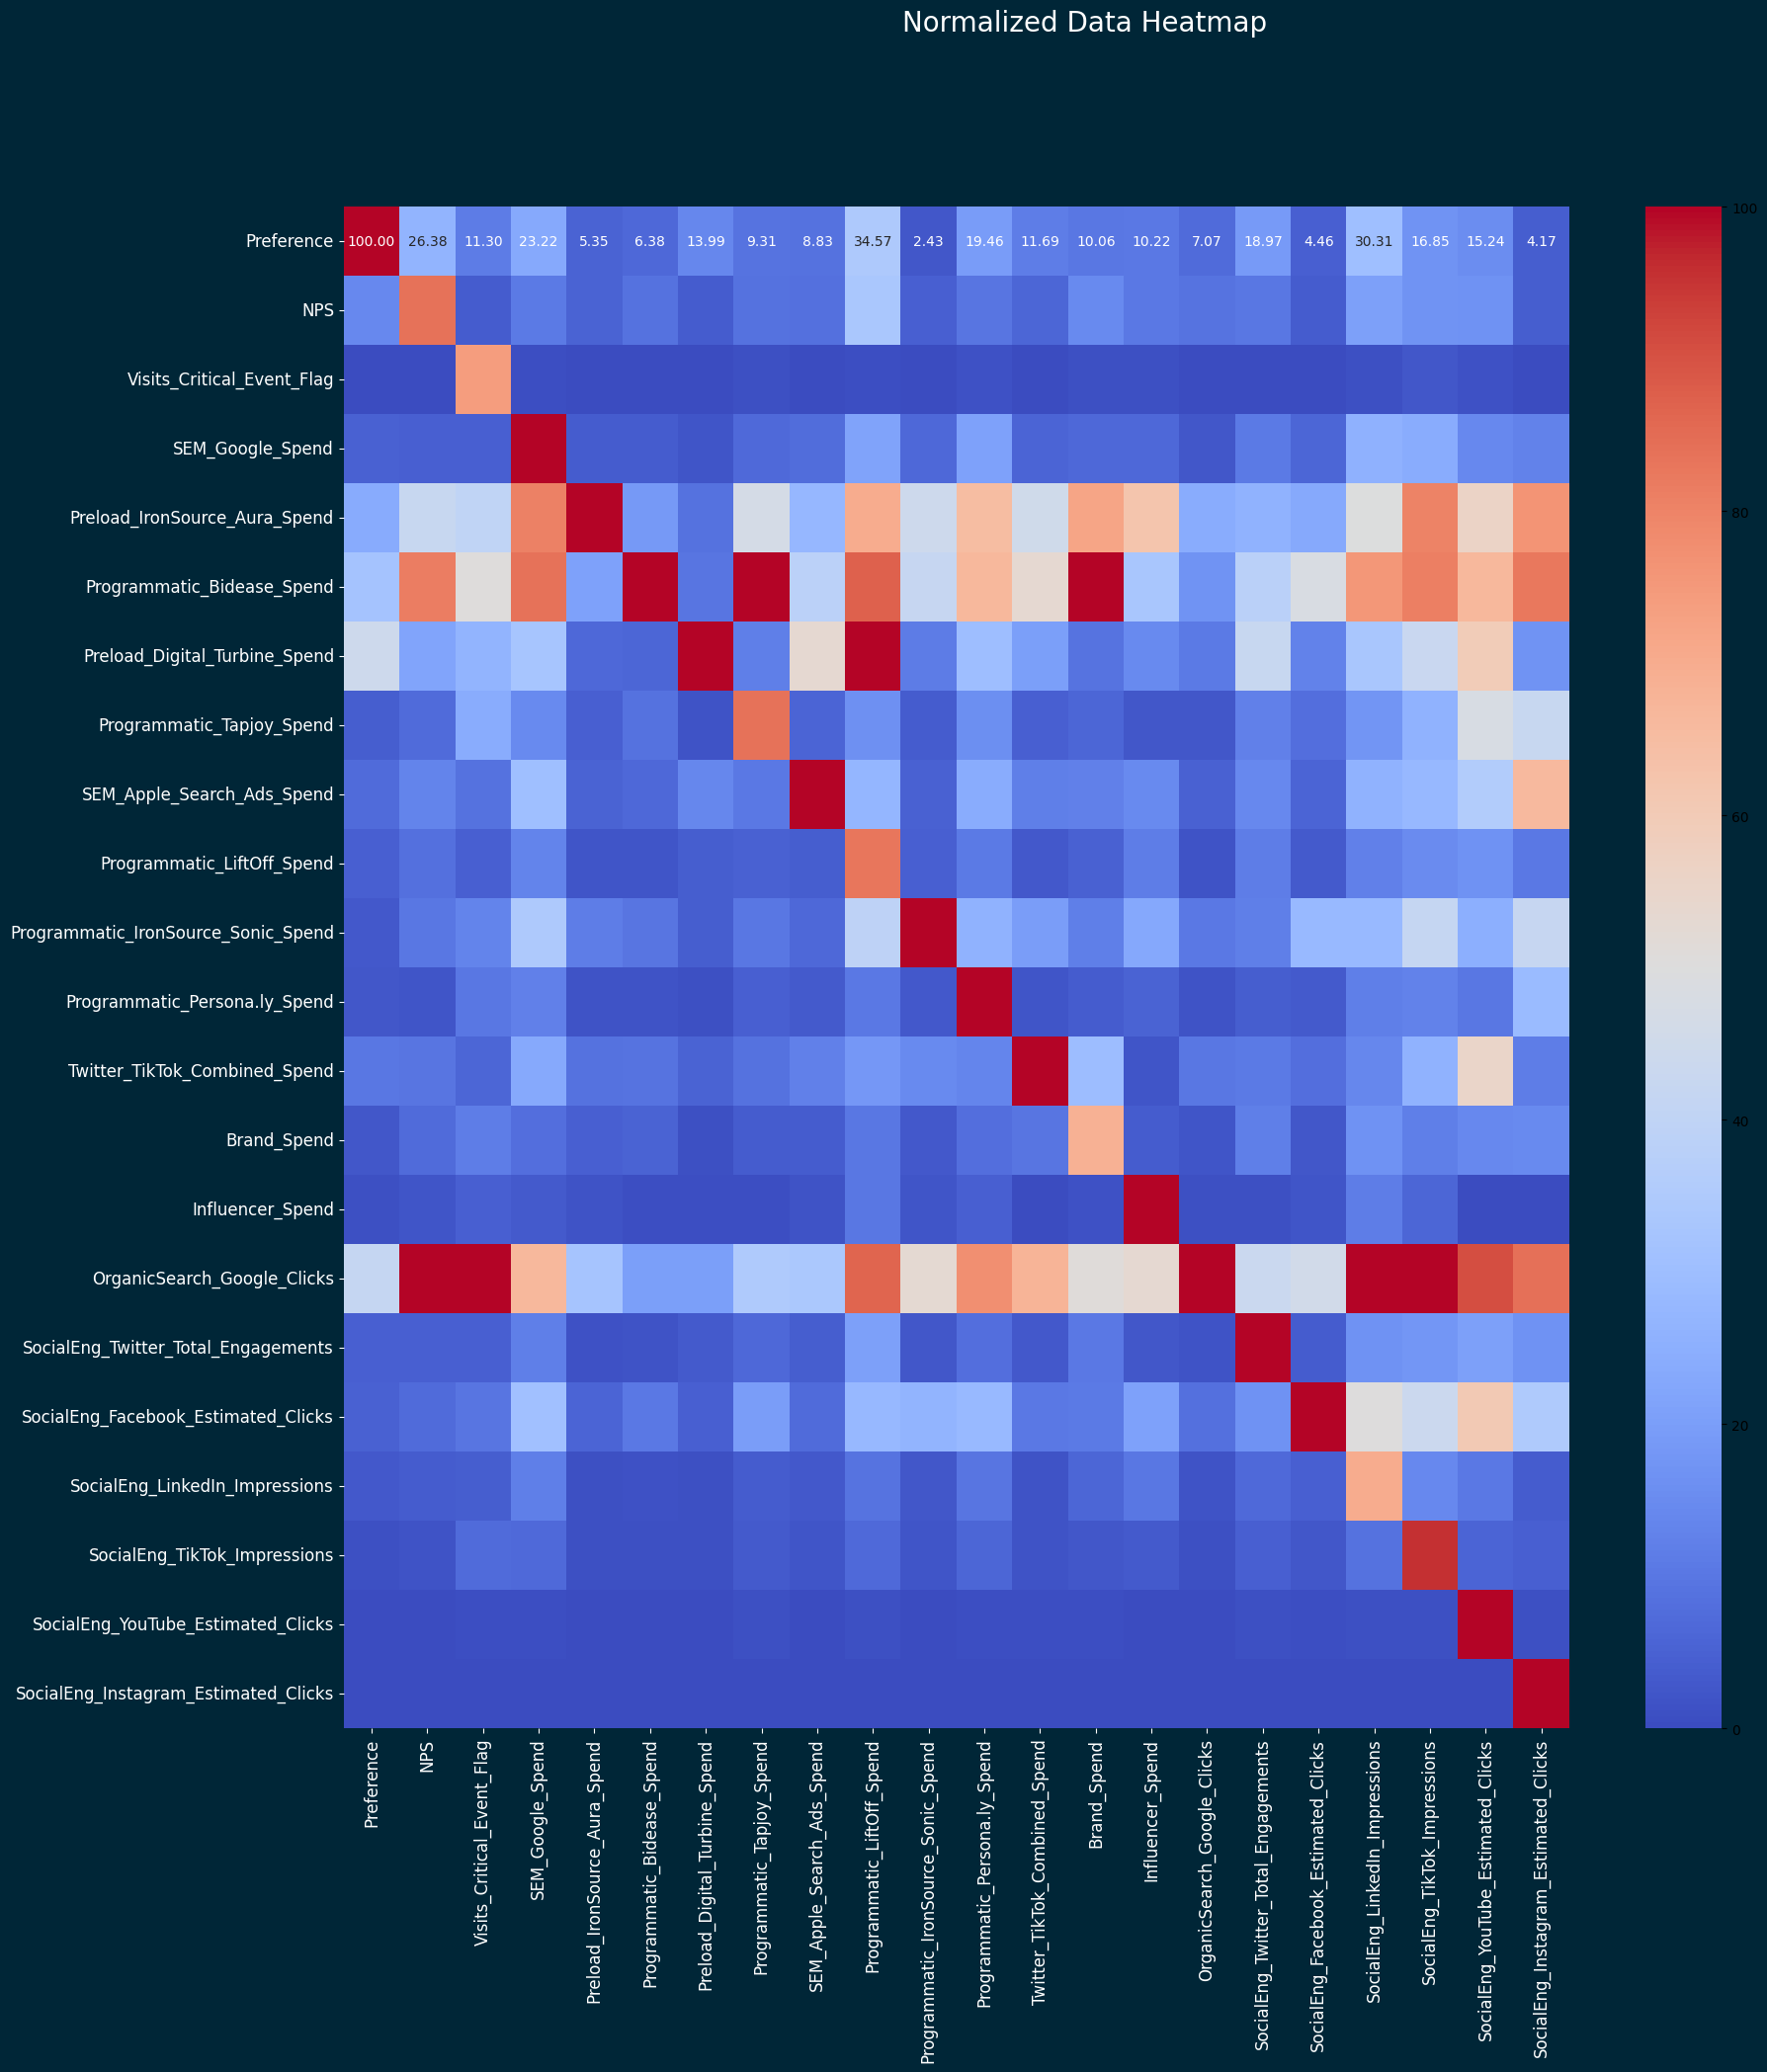

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalized is already defined and contains values between 0 and 1
# Convert to percentages if needed
df_percent = df_normalized

# Create a heatmap
fig = plt.figure(figsize=(20, 20), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_percent, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
            annot_kws={"size": 10})  # Adjust annotation font size as needed
ax.tick_params(axis='x', colors='w', labelsize=12, rotation=90)  # Adjust tick label size and rotation
ax.tick_params(axis='y', colors='w', labelsize=12)

plt.suptitle("Normalized Data Heatmap", color="white", fontsize=20, y=0.98)
plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
plt.show()


In [11]:
df_shap= df_shap.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

df_normalized

Preference         NPS  \
Preference                            100.000000   51.997830   
NPS                                    21.217828  100.000000   
Visits_Critical_Event_Flag              0.074335    0.126925   
SEM_Google_Spend                        6.870149    4.661921   
Preload_IronSource_Aura_Spend          17.632260   46.109549   
Programmatic_Bidease_Spend             27.773648   85.394086   
Preload_Digital_Turbine_Spend          28.105358   16.820067   
Programmatic_Tapjoy_Spend               3.846878    5.116698   
SEM_Apple_Search_Ads_Spend             10.333374   15.229221   
Programmatic_LiftOff_Spend              2.431916    7.509361   
Programmatic_IronSource_Sonic_Spend     2.326052    7.081469   
Programmatic_Persona.ly_Spend           2.719573    1.884234   
Twitter_TikTok_Combined_Spend          12.289732    6.104565   
Brand_Spend                             3.210682    9.211397   
Influencer_Spend                        0.854749    3.367204   
OrganicSearch_Google_Clicks            44.345021   92.079171   
SocialEng_Twitter_Total_Engagements     3.080872    3.865129   
SocialEng_Facebook_Estimated_Clicks     5.845806    7.966931   
SocialEng_LinkedIn_Impressions          2.979867    2.011562   
SocialEng_TikTok_Impressions            1.388382    2.345559   
SocialEng_YouTube_Estimated_Clicks      0.416364    0.403846   
SocialEng_Instagram_Estimated_Clicks    0.000000    0.000000   

                                      Visits_Critical_Event_Flag  \
Preference                                              9.394630   
NPS                                                     5.696169   
Visits_Critical_Event_Flag                             88.186813   
SEM_Google_Spend                                       10.524198   
Preload_IronSource_Aura_Spend                          72.138532   
Programmatic_Bidease_Spend                            100.000000   
Preload_Digital_Turbine_Spend                          97.559841   
Programmatic_Tapjoy_Spend                              30.486564   
SEM_Apple_Search_Ads_Spend                             26.072987   
Programmatic_LiftOff_Spend                             27.779076   
Programmatic_IronSource_Sonic_Spend                    69.410909   
Programmatic_Persona.ly_Spend                           8.519440   
Twitter_TikTok_Combined_Spend                          17.822211   
Brand_Spend                                            17.860700   
Influencer_Spend                                        4.087858   
OrganicSearch_Google_Clicks                            75.505834   
SocialEng_Twitter_Total_Engagements                    23.536617   
SocialEng_Facebook_Estimated_Clicks                    25.557839   
SocialEng_LinkedIn_Impressions                         14.674159   
SocialEng_TikTok_Impressions                            5.181991   
SocialEng_YouTube_Estimated_Clicks                      2.061402   
SocialEng_Instagram_Estimated_Clicks                    0.000000   

                                      SEM_Google_Spend  \
Preference                                   33.612831   
NPS                                           9.293789   
Visits_Critical_Event_Flag                    0.474512   
SEM_Google_Spend                            100.000000   
Preload_IronSource_Aura_Spend                52.544389   
Programmatic_Bidease_Spend                   45.433200   
Preload_Digital_Turbine_Spend                39.455514   
Programmatic_Tapjoy_Spend                     9.950517   
SEM_Apple_Search_Ads_Spend                   22.883854   
Programmatic_LiftOff_Spend                   10.152491   
Programmatic_IronSource_Sonic_Spend          16.275518   
Programmatic_Persona.ly_Spend                13.134069   
Twitter_TikTok_Combined_Spend                16.429426   
Brand_Spend                                  11.017068   
Influencer_Spend                              5.964423   
OrganicSearch_Google_Clicks                  41.018540   
SocialEng_Twit

6
7
12
R² Score: 0.7322
Adjusted R² Score: 0.7306
Mean Absolute Percentage Error (MAPE): 12.1118%
R² Score: 0.9302
Adjusted R² Score: 0.9297
Mean Absolute Percentage Error (MAPE): 5.8841%
R² Score: 0.9609
Adjusted R² Score: 0.9605
Mean Absolute Percentage Error (MAPE): 4.3551%


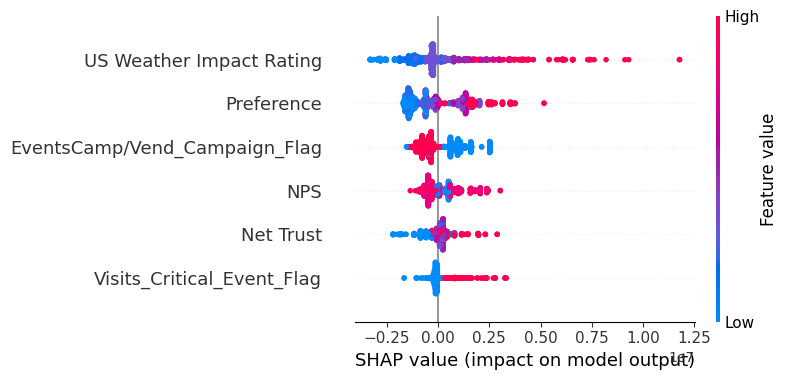

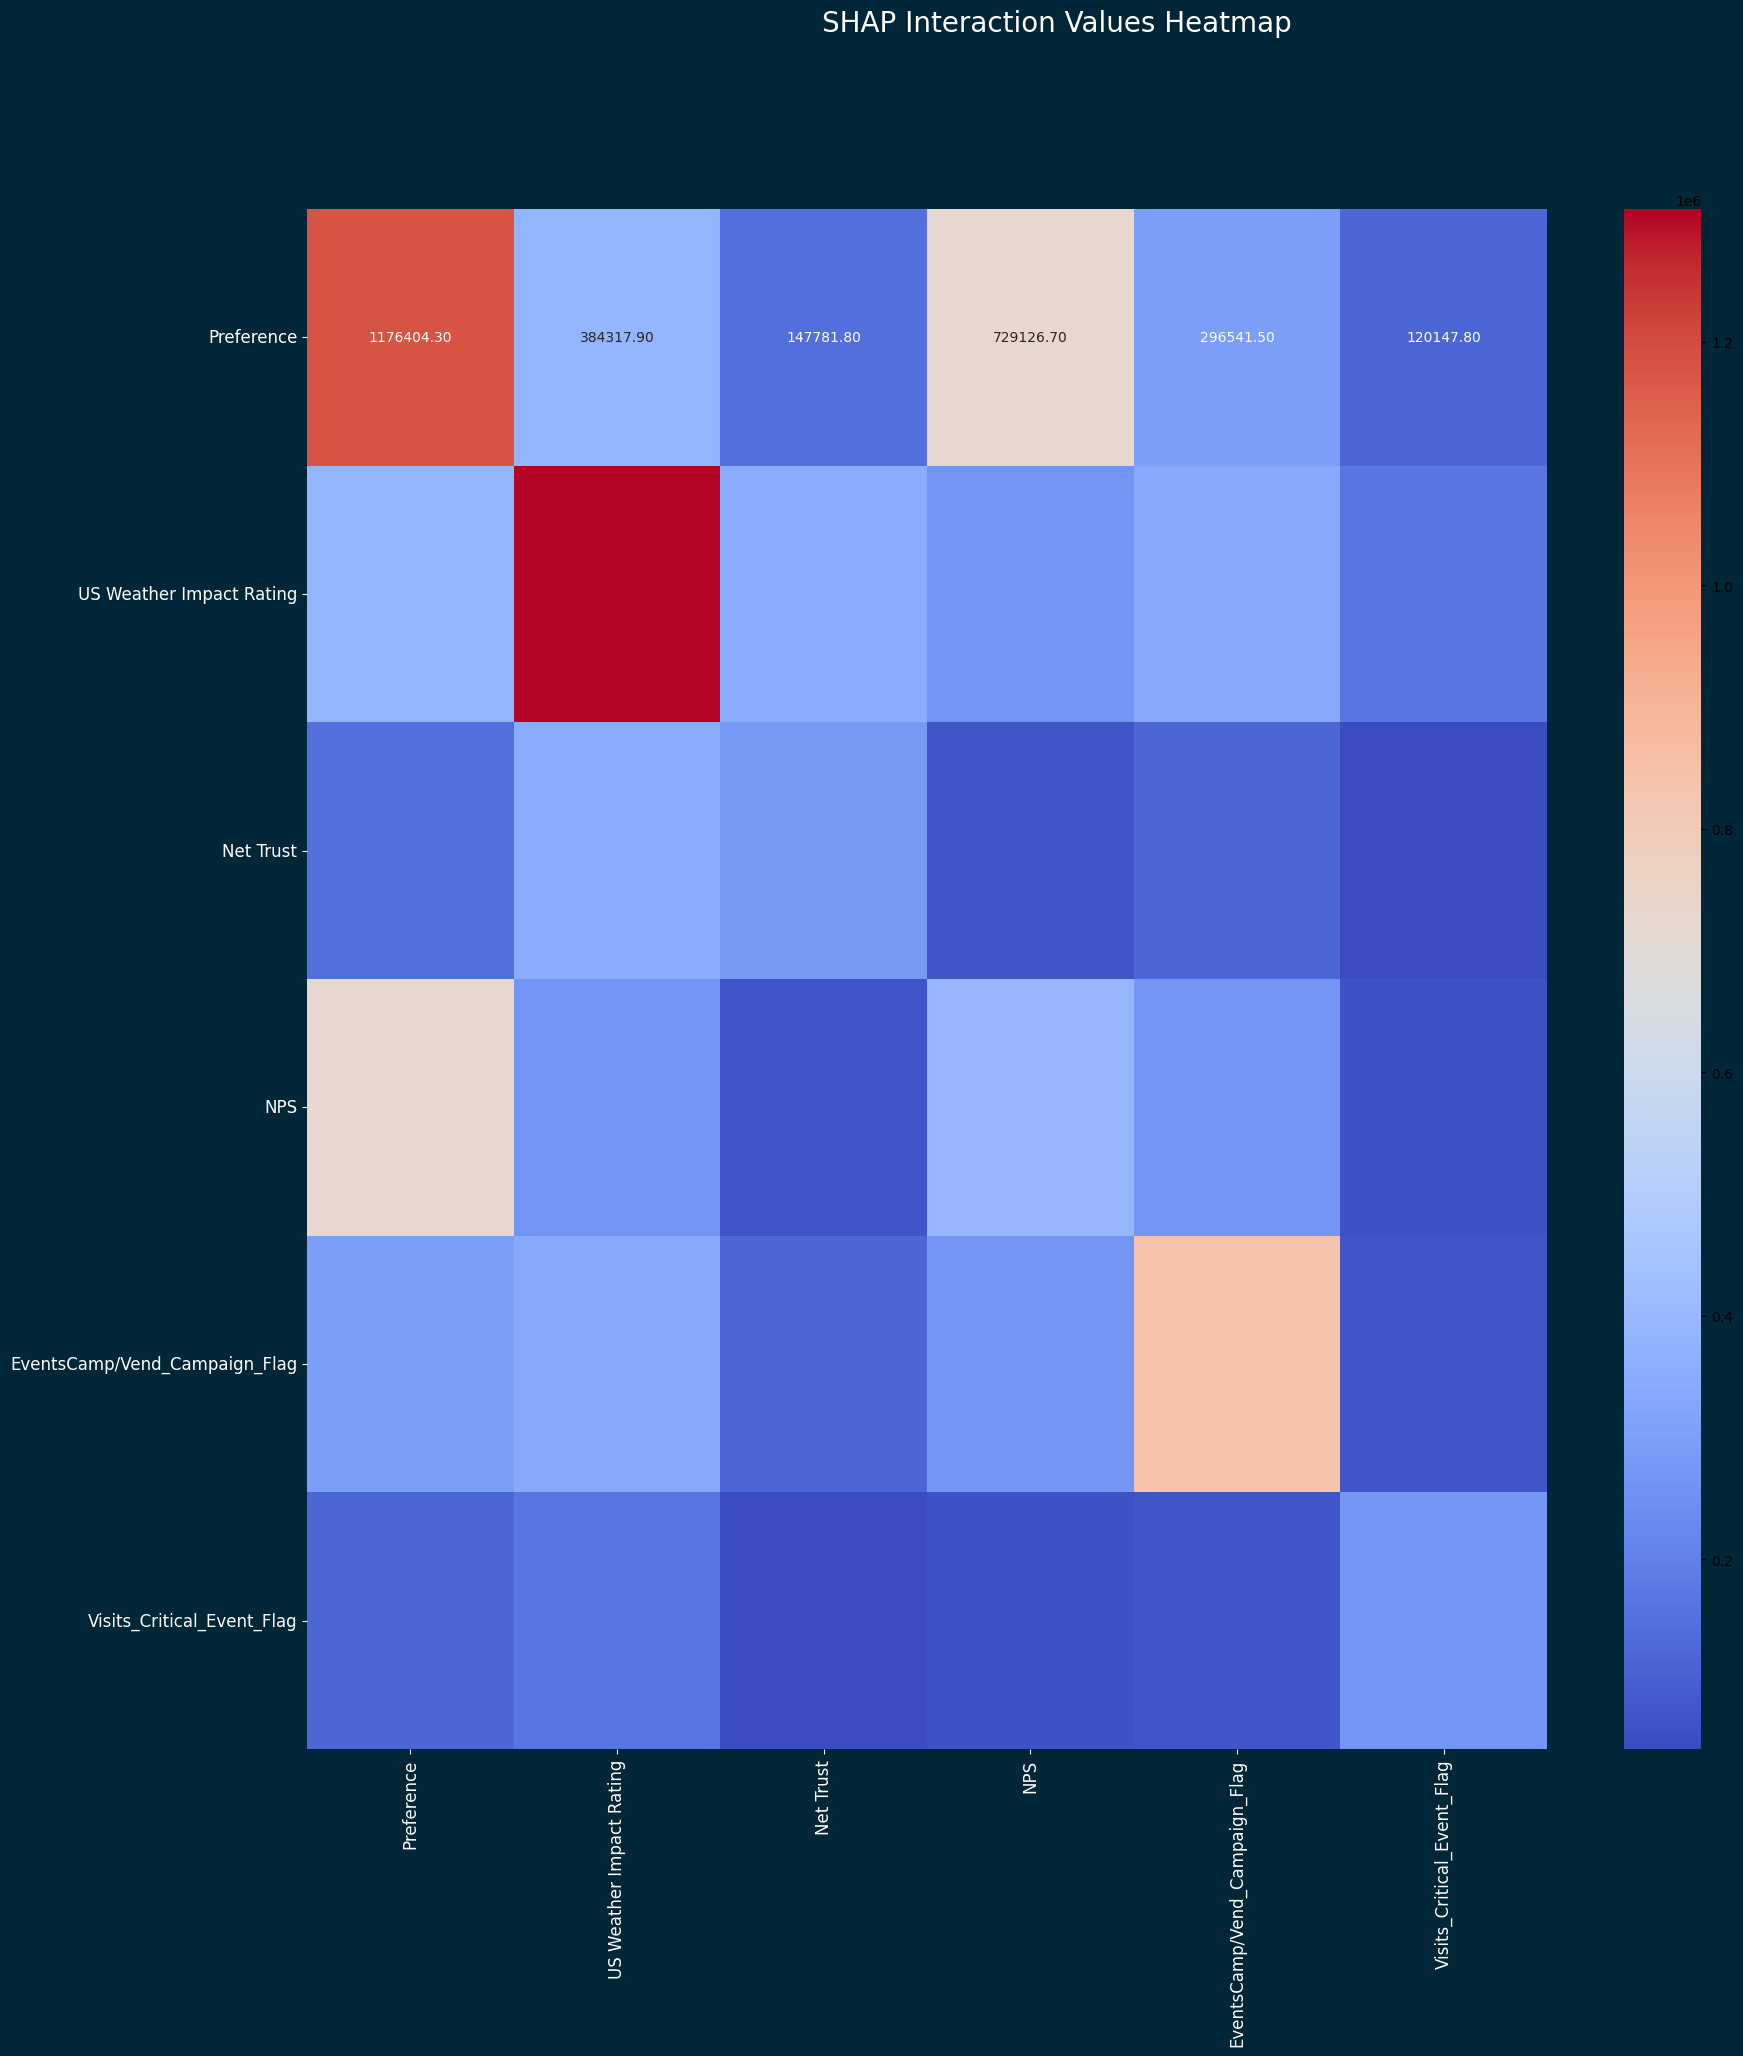

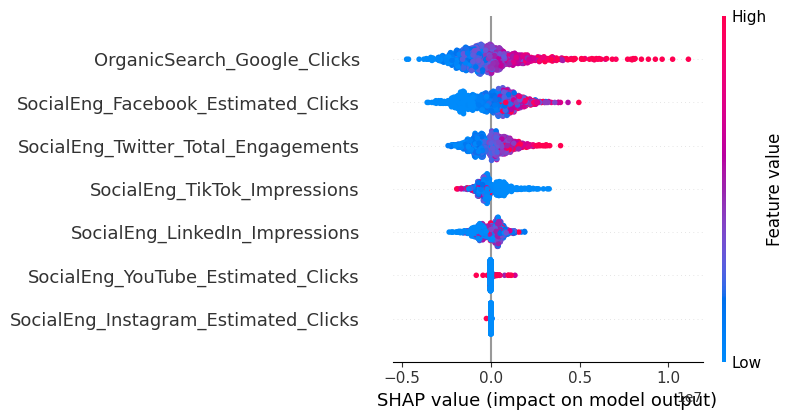

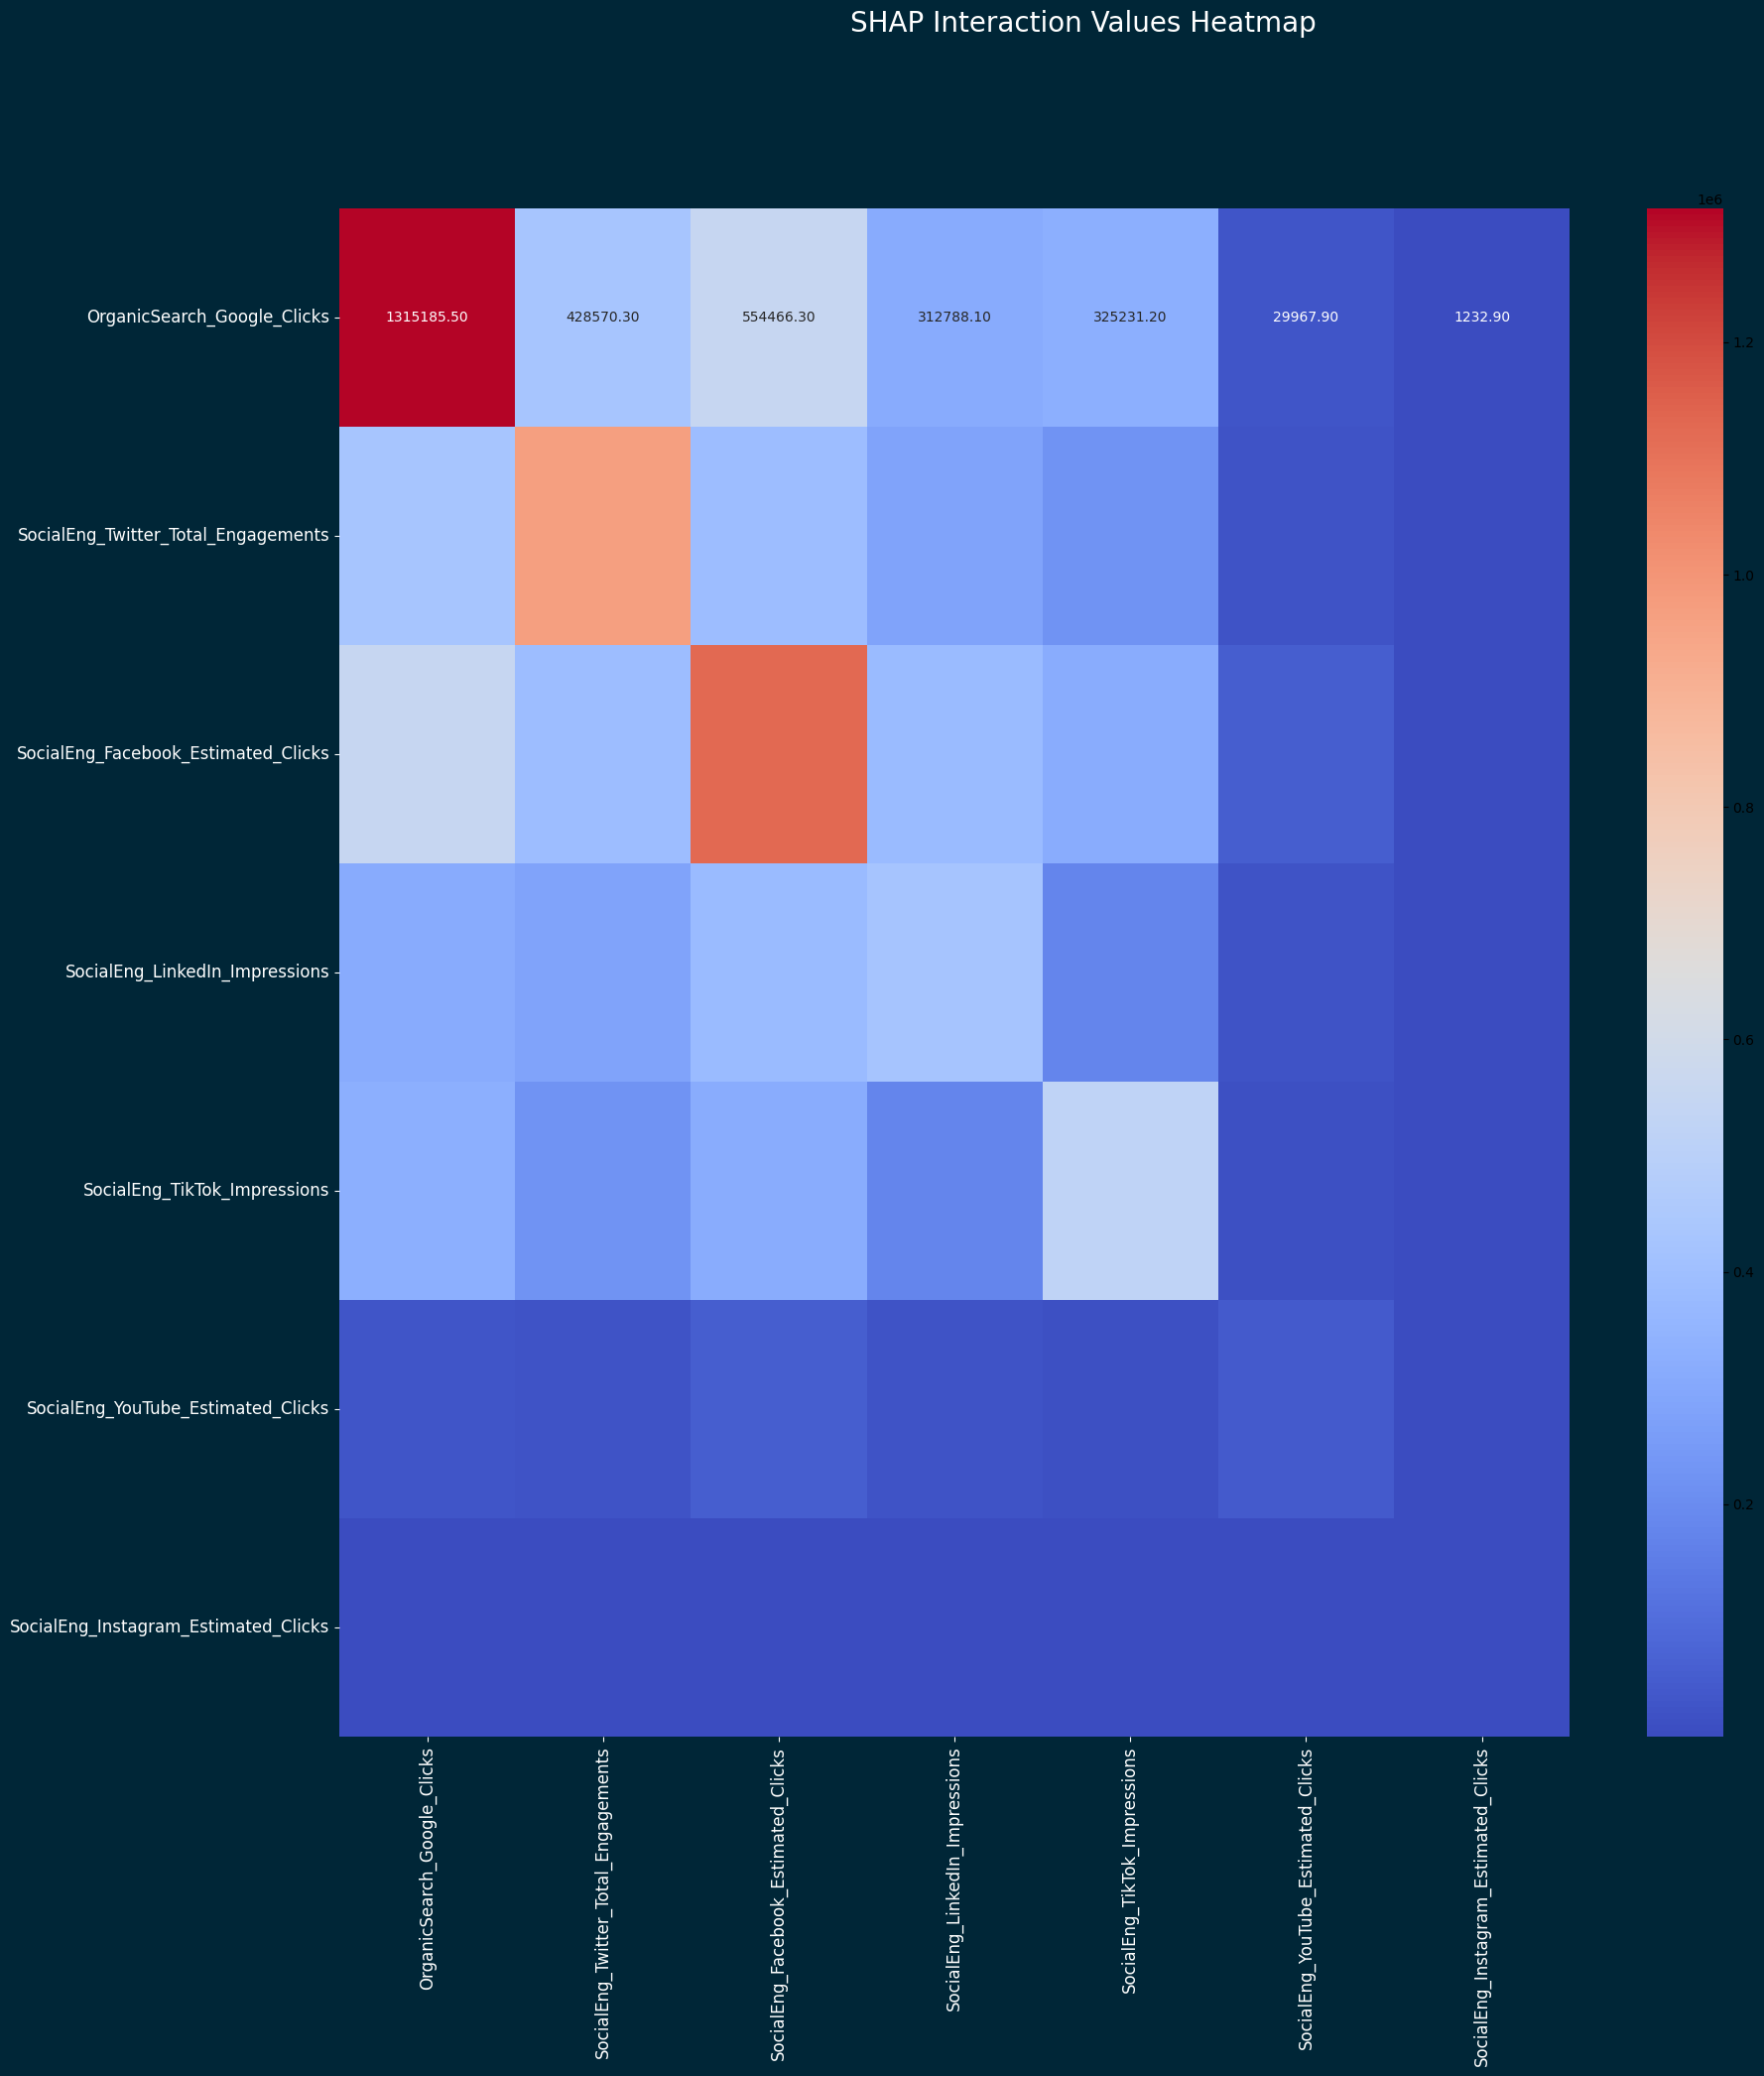

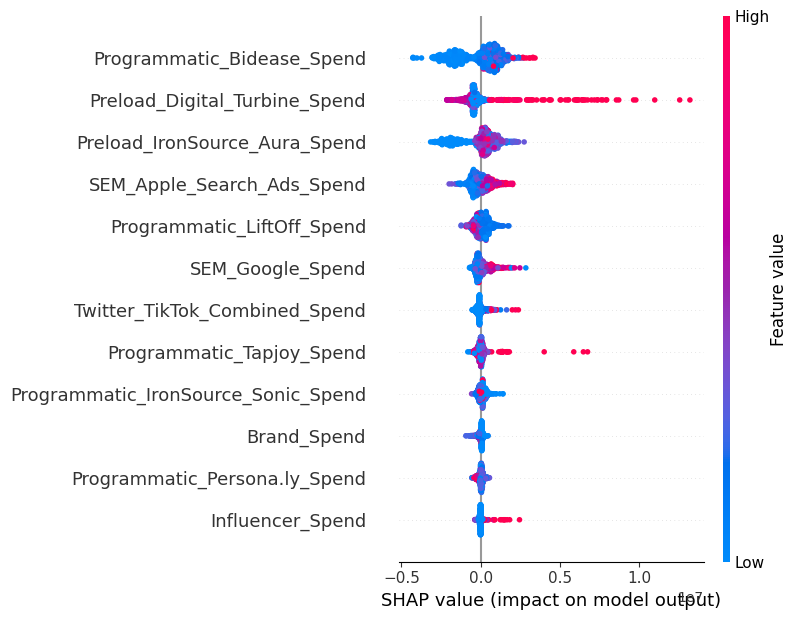

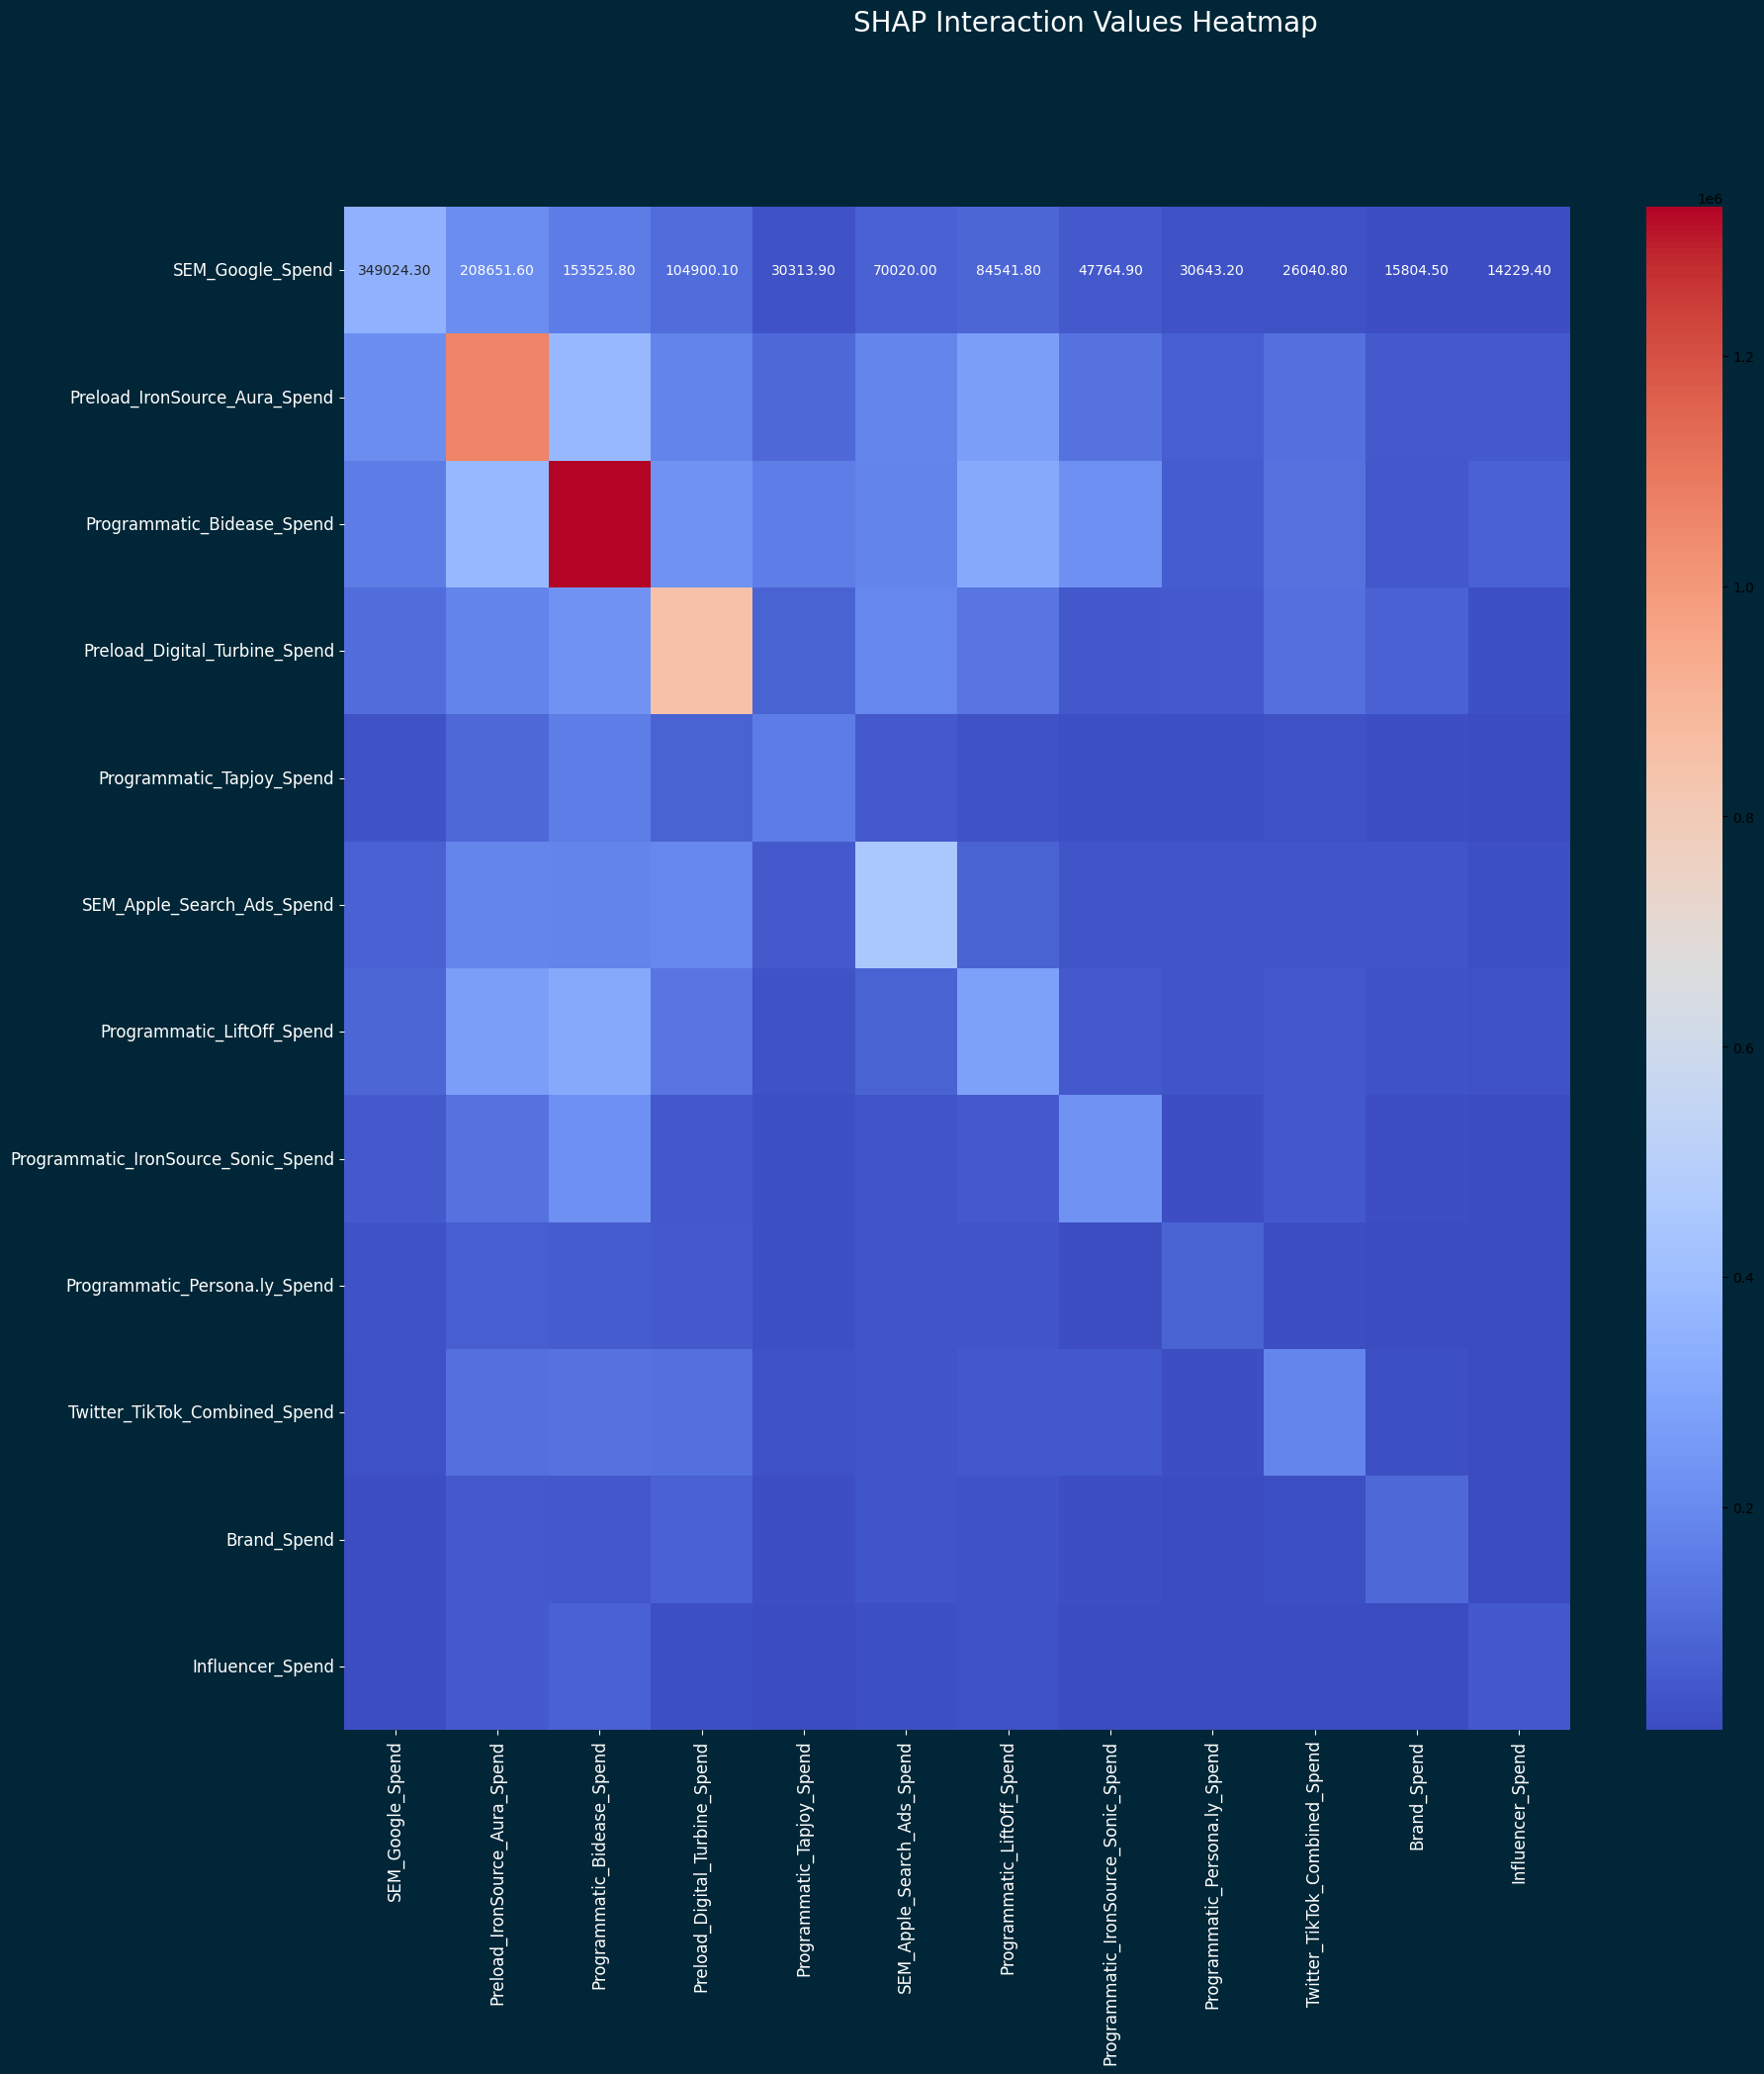

In [27]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load your dataset
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Latest ADS data (Preprocessing).xlsx")

# Define the column groups
base_cols = ['Preference', 'US Weather Impact Rating', 'Net Trust', 'NPS', 'EventsCamp/Vend_Campaign_Flag', 'Visits_Critical_Event_Flag']
organic_cols = ['OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
paid_media_cols = ['SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend']

print(len(base_cols))
print(len(organic_cols))
print(len(paid_media_cols))

# Remove the target column from base_cols to avoid redundancy
base_cols_no_target = [col for col in base_cols if col != 'dep_var']

# Prepare data for each group
X_base = df[base_cols_no_target].values
X_organic = df[organic_cols].values
X_paid = df[paid_media_cols].values
y = df['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Function to train model and calculate SHAP values
def train_and_shap(X, y, feature_names):
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predict on the entire dataset
    y_pred = rf_model.predict(X)

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Calculate Adjusted R²
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

    # Use SHAP to calculate SHAP values
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X)

    # Calculate SHAP interaction values
    interaction_values = explainer.shap_interaction_values(X)

    # Compute mean SHAP interaction values across all samples
    mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

    # Return SHAP values and the mean interaction values
    return shap_values, mean_interaction_values

# Train and get SHAP values for each group
shap_values_base, mean_interaction_base = train_and_shap(X_base, y, base_cols_no_target)
shap_values_organic, mean_interaction_organic = train_and_shap(X_organic, y, organic_cols)
shap_values_paid, mean_interaction_paid = train_and_shap(X_paid, y, paid_media_cols)

# Function to plot SHAP interaction heatmap
def plot_shap_interaction_heatmap(mean_interaction_values, feature_names):
    df_shap = pd.DataFrame(mean_interaction_values, index=feature_names, columns=feature_names)

    # Multiply off-diagonal elements by 2
    for i in range(len(df_shap)):
        for j in range(len(df_shap)):
            if i != j:
                df_shap.iloc[i, j] *= 2

    # Create the heatmap
    fig = plt.figure(figsize=(20, 20), facecolor='#002637', edgecolor='r')
    ax = fig.add_subplot()
    sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
                annot_kws={"size": 10})  # Adjust annotation font size as needed
    ax.tick_params(axis='x', colors='w', labelsize=12, rotation=90)  # Adjust tick label size and rotation
    ax.tick_params(axis='y', colors='w', labelsize=12)

    plt.suptitle("SHAP Interaction Values Heatmap", color="white", fontsize=20, y=0.98)
    plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
    plt.show()

# Plot SHAP summary plots and interaction heatmaps for each group
shap.summary_plot(shap_values_base, features=X_base, feature_names=base_cols_no_target)
plot_shap_interaction_heatmap(mean_interaction_base, base_cols_no_target)

shap.summary_plot(shap_values_organic, features=X_organic, feature_names=organic_cols)
plot_shap_interaction_heatmap(mean_interaction_organic, organic_cols)

shap.summary_plot(shap_values_paid, features=X_paid, feature_names=paid_media_cols)
plot_shap_interaction_heatmap(mean_interaction_paid, paid_media_cols)



## Random Forest Model just Base, Paid & Organic

R² Score: 0.9344
Adjusted R² Score: 0.9342
Mean Absolute Percentage Error (MAPE): 5.1297%


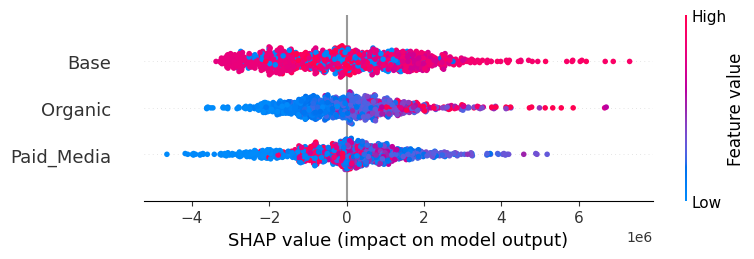

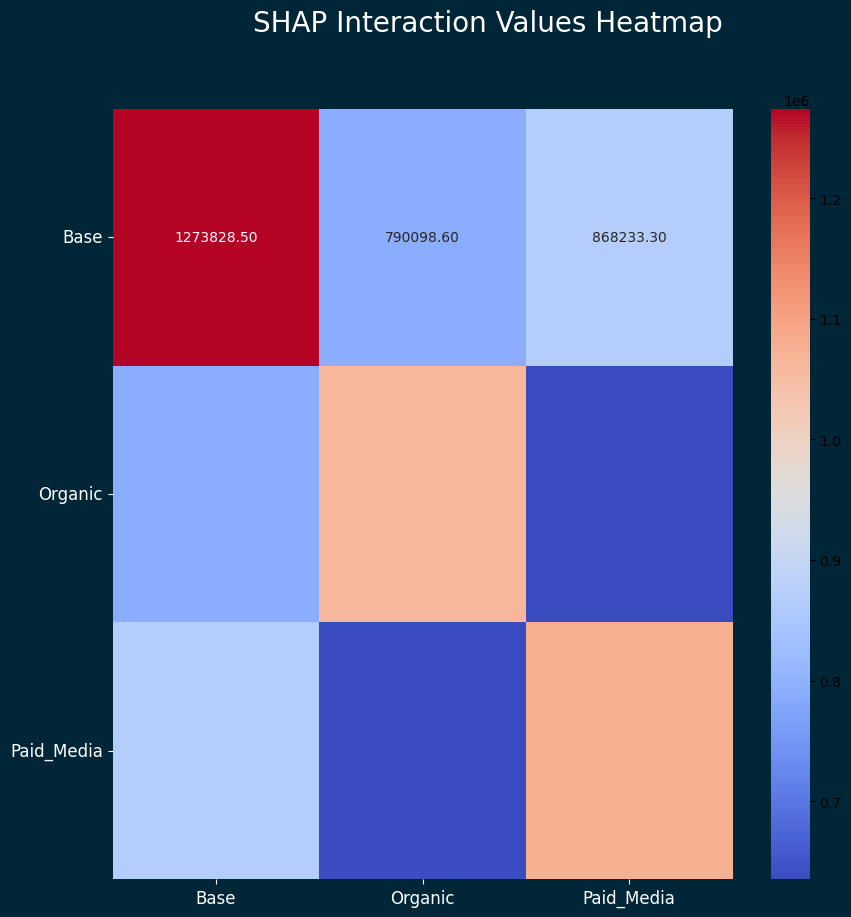

In [28]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load your dataset
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Latest ADS data (Preprocessing).xlsx")

# Define the column groups
base_cols = ['Preference', 'US Weather Impact Rating', 'Net Trust', 'NPS', 'EventsCamp/Vend_Campaign_Flag', 'Visits_Critical_Event_Flag']
organic_cols = ['OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
paid_media_cols = ['SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend']

# Combine the features into their respective categories
df['Base'] = df[base_cols].sum(axis=1)
df['Organic'] = df[organic_cols].sum(axis=1)
df['Paid_Media'] = df[paid_media_cols].sum(axis=1)

# Prepare data for the aggregated columns
X_combined = df[['Base', 'Organic', 'Paid_Media']].values
y = df['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Function to train model and calculate SHAP values
def train_and_shap(X, y, feature_names):
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predict on the entire dataset
    y_pred = rf_model.predict(X)

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Calculate Adjusted R²
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

    # Use SHAP to calculate SHAP values
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X)

    # Calculate SHAP interaction values
    interaction_values = explainer.shap_interaction_values(X)

    # Compute mean SHAP interaction values across all samples
    mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

    # Return SHAP values and the mean interaction values
    return shap_values, mean_interaction_values

# Train and get SHAP values for the combined columns
shap_values_combined, mean_interaction_combined = train_and_shap(X_combined, y, ['Base', 'Organic', 'Paid_Media'])

# Function to plot SHAP interaction heatmap
def plot_shap_interaction_heatmap(mean_interaction_values, feature_names):
    df_shap = pd.DataFrame(mean_interaction_values, index=feature_names, columns=feature_names)

    # Multiply off-diagonal elements by 2
    for i in range(len(df_shap)):
        for j in range(len(df_shap)):
            if i != j:
                df_shap.iloc[i, j] *= 2

    # Create the heatmap
    fig = plt.figure(figsize=(10, 10), facecolor='#002637', edgecolor='r')
    ax = fig.add_subplot()
    sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
                annot_kws={"size": 10})  # Adjust annotation font size as needed
    ax.tick_params(axis='x', colors='w', labelsize=12, rotation=0)  # Adjust tick label size and rotation
    ax.tick_params(axis='y', colors='w', labelsize=12)

    plt.suptitle("SHAP Interaction Values Heatmap", color="white", fontsize=20, y=0.98)
    plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
    plt.show()

# Plot SHAP summary plot and interaction heatmap for the combined columns
shap.summary_plot(shap_values_combined, features=X_combined, feature_names=['Base', 'Organic', 'Paid_Media'])
plot_shap_interaction_heatmap(mean_interaction_combined, ['Base', 'Organic', 'Paid_Media'])


R² Score: 0.9344
Adjusted R² Score: 0.9342
Mean Absolute Percentage Error (MAPE): 5.1297%


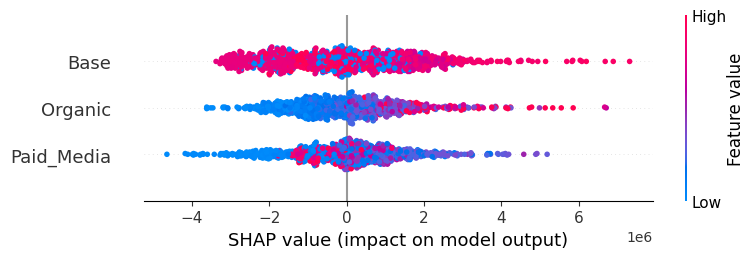

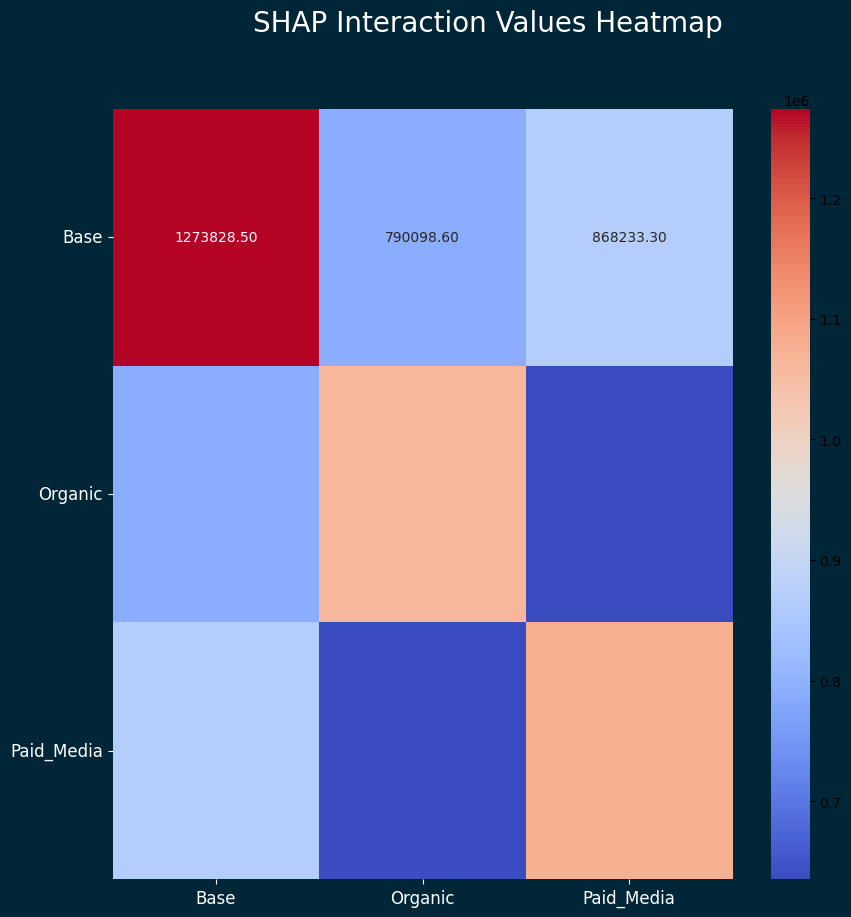

SHAP Values DataFrame:
              Base       Organic    Paid_Media
0    -2.213858e+05  3.028800e+06  3.234977e+06
1     1.634169e+06 -8.187365e+04  6.776377e+05
2     6.939657e+05 -9.639893e+05 -1.117489e+06
3     7.389921e+05 -2.025882e+06 -8.712664e+04
4     9.325911e+05 -2.243883e+06  3.229196e+05
...            ...           ...           ...
999  -1.585289e+06  8.525612e+05  4.801975e+05
1000 -1.970332e+06  1.112657e+06  5.012573e+05
1001 -1.699697e+06 -1.087092e+06  1.529101e+06
1002 -2.517923e+06 -4.275427e+05  2.350776e+05
1003 -1.797028e+06 -1.163638e+06  2.171589e+06

[1004 rows x 3 columns]

Mean SHAP Interaction Values DataFrame:
                    Base       Organic    Paid_Media
Base        1.273828e+06  7.900986e+05  8.682333e+05
Organic     7.900986e+05  1.062887e+06  6.354403e+05
Paid_Media  8.682333e+05  6.354403e+05  1.077282e+06


In [33]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load your dataset
df = pd.read_excel("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Latest ADS data (Preprocessing).xlsx")

# Define the column groups
base_cols = ['Preference', 'US Weather Impact Rating', 'Net Trust', 'NPS', 'EventsCamp/Vend_Campaign_Flag', 'Visits_Critical_Event_Flag']
organic_cols = ['OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
paid_media_cols = ['SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend']

# Combine the features into their respective categories
df['Base'] = df[base_cols].sum(axis=1)
df['Organic'] = df[organic_cols].sum(axis=1)
df['Paid_Media'] = df[paid_media_cols].sum(axis=1)

# Prepare the final DataFrame
df_final = df[['Base', 'Organic', 'Paid_Media', 'Overall_Web_Visits']]

# Prepare data for the aggregated columns
X_combined = df_final[['Base', 'Organic', 'Paid_Media']].values
y = df_final['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Function to train model and calculate SHAP values
def train_and_shap(X, y, feature_names):
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predict on the entire dataset
    y_pred = rf_model.predict(X)

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Calculate Adjusted R²
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

    # Use SHAP to calculate SHAP values
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X)

    # Calculate SHAP interaction values
    interaction_values = explainer.shap_interaction_values(X)

    # Compute mean SHAP interaction values across all samples
    mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

    # Return SHAP values and the mean interaction values
    return shap_values, mean_interaction_values

# Train and get SHAP values for the combined columns
shap_values_combined, mean_interaction_combined = train_and_shap(X_combined, y, ['Base', 'Organic', 'Paid_Media'])

# Convert SHAP values and interaction values to DataFrames
shap_values_df = pd.DataFrame(shap_values_combined, columns=['Base', 'Organic', 'Paid_Media'])
mean_interaction_df = pd.DataFrame(mean_interaction_combined, index=['Base', 'Organic', 'Paid_Media'], columns=['Base', 'Organic', 'Paid_Media'])

# Function to plot SHAP interaction heatmap
def plot_shap_interaction_heatmap(mean_interaction_values, feature_names):
    df_shap = pd.DataFrame(mean_interaction_values, index=feature_names, columns=feature_names)

    # Multiply off-diagonal elements by 2
    for i in range(len(df_shap)):
        for j in range(len(df_shap)):
            if i != j:
                df_shap.iloc[i, j] *= 2

    # Create the heatmap
    fig = plt.figure(figsize=(10, 10), facecolor='#002637', edgecolor='r')
    ax = fig.add_subplot()
    sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
                annot_kws={"size": 10})  # Adjust annotation font size as needed
    ax.tick_params(axis='x', colors='w', labelsize=12, rotation=0)  # Adjust tick label size and rotation
    ax.tick_params(axis='y', colors='w', labelsize=12)

    plt.suptitle("SHAP Interaction Values Heatmap", color="white", fontsize=20, y=0.98)
    plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
    plt.show()

# Plot SHAP summary plot and interaction heatmap for the combined columns
shap.summary_plot(shap_values_combined, features=X_combined, feature_names=['Base', 'Organic', 'Paid_Media'])
plot_shap_interaction_heatmap(mean_interaction_combined, ['Base', 'Organic', 'Paid_Media'])

# Display the SHAP values DataFrame and interaction values DataFrame
print("SHAP Values DataFrame:")
print(shap_values_df)
print("\nMean SHAP Interaction Values DataFrame:")
print(mean_interaction_df)


In [36]:
interaction_values

array([[[ 6.95257013e+05,  2.32113667e+04,  1.32517597e+04, ...,
          3.49570672e+03,  4.79985126e+02,  2.75466557e+01],
        [ 2.32113667e+04,  6.47902897e+04,  2.03506221e+02, ...,
          3.56358733e+03, -4.94133116e+02, -5.66947785e+00],
        [ 1.32517597e+04,  2.03506221e+02, -5.79452482e+04, ...,
          2.60839249e+03, -1.55837157e+00, -1.23926768e+00],
        ...,
        [ 3.49570672e+03,  3.56358733e+03,  2.60839249e+03, ...,
         -3.22368967e+04, -5.95063735e+02,  2.77732062e+00],
        [ 4.79985126e+02, -4.94133116e+02, -1.55837157e+00, ...,
         -5.95063735e+02, -7.87348812e+03, -1.27611379e-01],
        [ 2.75466557e+01, -5.66947785e+00, -1.23926768e+00, ...,
          2.77732062e+00, -1.27611379e-01, -1.50159784e+02]],

       [[ 6.72962748e+05,  3.55654844e+04, -4.23184872e+01, ...,
          6.95654174e+03, -1.24085418e+02,  4.25386431e+00],
        [ 3.55654844e+04,  5.77270186e+04, -1.90140608e+02, ...,
          3.37640604e+03, -5.81630262e

In [37]:
mean_interaction_df

Base       Organic    Paid_Media
Base        1.273828e+06  7.900986e+05  8.682333e+05
Organic     7.900986e+05  1.062887e+06  6.354403e+05
Paid_Media  8.682333e+05  6.354403e+05  1.077282e+06

In [ ]:
#

In [34]:
df_shap= mean_interaction_df.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

df_normalized

Base     Organic  Paid_Media
Base        100.000000   36.181921   52.686995
Organic       0.000000  100.000000    0.000000
Paid_Media   16.152556    0.000000  100.000000

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_normalized is already defined and contains values between 0 and 1
# Convert to percentages if needed
df_percent = df_normalized

# Create a heatmap
fig = plt.figure(figsize=8, 8), facecolor='#002637', edgecolor='r')
ax = fig.add_subplot()
sns.heatmap(df_percent, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
            annot_kws={"size": 10})  # Adjust annotation font size as needed
ax.tick_params(axis='x', colors='w', labelsize=12, rotation=90)  # Adjust tick label size and rotation
ax.tick_params(axis='y', colors='w', labelsize=12)

plt.suptitle("Normalized Data Heatmap", color="white", fontsize=20, y=0.98)
plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
plt.show()


SyntaxError: unmatched ')' (3098102376.py, line 10)

In [29]:
df_shap

Preference            NPS  \
Preference                            238147.191090   33560.200765   
NPS                                    33560.200765  106390.517885   
Visits_Critical_Event_Flag               576.953677     188.809050   
SEM_Google_Spend                       11686.692247    5505.794160   
Preload_IronSource_Aura_Spend          55990.247566   53808.869806   
Programmatic_Bidease_Spend             75962.253269  103546.856109   
Preload_Digital_Turbine_Spend         105694.993118   27420.444656   
Programmatic_Tapjoy_Spend               9821.722395    9103.520518   
SEM_Apple_Search_Ads_Spend             17500.614102   16815.079242   
Programmatic_LiftOff_Spend             10878.322055   10513.980329   
Programmatic_IronSource_Sonic_Spend     6742.670092   12611.977597   
Programmatic_Persona.ly_Spend           5740.474933    2835.296811   
Twitter_TikTok_Combined_Spend          23670.006589   12030.780871   
Brand_Spend                             6460.680547    9376.333833   
Influencer_Spend                        2761.643032    2758.415310   
OrganicSearch_Google_Clicks            98796.179263  127207.012875   
SocialEng_Twitter_Total_Engagements    10646.508428    5618.862238   
SocialEng_Facebook_Estimated_Clicks    11419.667964    9376.132731   
SocialEng_LinkedIn_Impressions          7165.009042    4895.451064   
SocialEng_TikTok_Impressions            2447.087605    2473.826604   
SocialEng_YouTube_Estimated_Clicks       353.849284     387.148429   
SocialEng_Instagram_Estimated_Clicks       9.434508       9.376553   

                                      Visits_Critical_Event_Flag  \
Preference                                            576.953677   
NPS                                                   188.809050   
Visits_Critical_Event_Flag                           3761.777562   
SEM_Google_Spend                                      239.234773   
Preload_IronSource_Aura_Spend                        2049.319875   
Programmatic_Bidease_Spend                           2584.116688   
Preload_Digital_Turbine_Spend                        1350.947426   
Programmatic_Tapjoy_Spend                            1220.556462   
SEM_Apple_Search_Ads_Spend                            456.762395   
Programmatic_LiftOff_Spend                            221.161136   
Programmatic_IronSource_Sonic_Spend                   659.085003   
Programmatic_Persona.ly_Spend                         516.171023   
Twitter_TikTok_Combined_Spend                         317.377026   
Brand_Spend                                           597.595273   
Influencer_Spend                                      228.883634   
OrganicSearch_Google_Clicks                          5094.843428   
SocialEng_Twitter_Total_Engagements                   227.015975   
SocialEng_Facebook_Estimated_Clicks                   498.500906   
SocialEng_LinkedIn_Impressions                        207.763217   
SocialEng_TikTok_Impressions                          366.070082   
SocialEng_YouTube_Estimated_Clicks                     36.850288   
SocialEng_Instagram_Estimated_Clicks                    1.110125   

                                      SEM_Google_Spend  \
Preference                                11686.692247   
NPS                                        5505.794160   
Visits_Critical_Event_Flag                  239.234773   
SEM_Google_Spend                          50245.878824   
Preload_IronSource_Aura_Spend             40614.001486   
Programmatic_Bidease_Spend                42174.018291   
Preload_Digital_Turbine_Spend             16417.519525   
Programmatic_Tapjoy_Spend                  7340.836480   
SEM_Apple_Search_Ads_Spend                15268.613093   
Programmatic_LiftOff_Spend                 6648.923669   
Programmatic_IronSource_Sonic_Spend       17324.517129   
Programmatic_Persona.ly_Spend              6116.974265   
Twitter_TikTok_Combined_Spend             11671.720745   
Brand_Spend                                4079.49615

In [9]:
df_normalized.to_clipboard()

In [6]:
df_shap

Preference           NPS  \
Preference                            224408.783614  42775.680125   
NPS                                    42775.680125  92394.895566   
Visits_Critical_Event_Flag               248.465935    550.377871   
SEM_Google_Spend                       12356.180363   3476.267181   
Preload_IronSource_Aura_Spend          35774.311793  42113.524909   
Programmatic_Bidease_Spend             65036.650821  77091.878822   
Preload_Digital_Turbine_Spend          52114.248165  19634.005079   
Programmatic_Tapjoy_Spend              12781.530253   7894.022583   
SEM_Apple_Search_Ads_Spend             15311.021323  12895.108963   
Programmatic_LiftOff_Spend              6735.809179   7843.323691   
Programmatic_IronSource_Sonic_Spend     5141.009264   6083.058058   
Programmatic_Persona.ly_Spend           7189.823468   3582.529806   
Twitter_TikTok_Combined_Spend          30228.829592  14643.488443   
Brand_Spend                             9429.470315   7840.694911   
Influencer_Spend                         927.860999    296.736883   
OrganicSearch_Google_Clicks           106421.129492  99285.344120   
SocialEng_Twitter_Total_Engagements     9536.076246   6360.637646   
SocialEng_Facebook_Estimated_Clicks    19243.270024  11020.948129   
SocialEng_LinkedIn_Impressions          8395.842962   2029.991952   
SocialEng_TikTok_Impressions            3986.289339   1604.184875   
SocialEng_YouTube_Estimated_Clicks       653.979055    785.867718   
SocialEng_Instagram_Estimated_Clicks      18.900055     12.733967   

                                      Visits_Critical_Event_Flag  \
Preference                                            248.465935   
NPS                                                   550.377871   
Visits_Critical_Event_Flag                           1553.849332   
SEM_Google_Spend                                      142.929843   
Preload_IronSource_Aura_Spend                        1226.497804   
Programmatic_Bidease_Spend                           2449.132672   
Preload_Digital_Turbine_Spend                        1169.661629   
Programmatic_Tapjoy_Spend                             148.072506   
SEM_Apple_Search_Ads_Spend                            674.197175   
Programmatic_LiftOff_Spend                            270.306279   
Programmatic_IronSource_Sonic_Spend                   937.666675   
Programmatic_Persona.ly_Spend                         317.056245   
Twitter_TikTok_Combined_Spend                         308.681794   
Brand_Spend                                           376.878129   
Influencer_Spend                                       54.947678   
OrganicSearch_Google_Clicks                          2339.534750   
SocialEng_Twitter_Total_Engagements                   410.876933   
SocialEng_Facebook_Estimated_Clicks                   438.182854   
SocialEng_LinkedIn_Impressions                        145.993052   
SocialEng_TikTok_Impressions                          141.801692   
SocialEng_YouTube_Estimated_Clicks                      2.559403   
SocialEng_Instagram_Estimated_Clicks                    0.000000   

                                      SEM_Google_Spend  \
Preference                                12356.180363   
NPS                                        3476.267181   
Visits_Critical_Event_Flag                  142.929843   
SEM_Google_Spend                          38485.232412   
Preload_IronSource_Aura_Spend             32947.407029   
Programmatic_Bidease_Spend                30455.864228   
Preload_Digital_Turbine_Spend             17469.295960   
Programmatic_Tapjoy_Spend                  6980.151175   
SEM_Apple_Search_Ads_Spend                18684.856542   
Programmatic_LiftOff_Spend                 7412.567886   
Programmatic_IronSource_Sonic_Spend       11959.030893   
Programmatic_Persona.ly_Spend              5456.172694   
Twitter_TikTok_Combined_Spend              8798.334613   
Brand_Spend                                3519.713006   
Influencer_Spend  

In [46]:
mean_shap

array([[1.00000000e+00, 1.82271715e+01, 5.02621950e+02, 4.95815953e-07,
        2.95205817e-06, 1.14167546e-07, 9.24184363e-05, 1.29972079e-06,
        2.58433984e-05, 2.96773796e-05, 1.86838363e-05, 2.64743490e-02,
        2.35639264e-03, 9.97946069e-07,            inf, 3.02431180e-04,
        4.99983245e-03, 1.21823683e-06,            inf, 6.29183303e-08,
        5.58139807e-06],
       [1.33774010e+00, 1.00000000e+00, 1.23851943e+02, 1.35593952e-07,
        7.61088273e-07, 2.90463530e-08, 2.39497535e-05, 3.03241248e-07,
        4.76381207e-06, 2.04360788e-05, 2.97120808e-06, 8.11554048e-03,
        6.74196223e-04, 2.38062404e-07,            inf, 7.90543632e-05,
        1.18359255e-03, 3.00032337e-07,            inf, 1.00111050e-08,
        1.29650359e-06],
       [4.00154730e-01, 2.70793089e-01, 1.00000000e+00, 7.90633828e-09,
        3.80916393e-08, 1.56458724e-09, 1.22459094e-06, 1.44556152e-08,
        1.76111080e-07, 4.31199350e-07, 1.83641556e-07, 1.31540089e-04,
        4.5611